In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
from skimage.transform import resize
from skimage.io import imread, imsave

In [15]:
def plot_sample(x, axis):
    # img = x.reshape(96,96)
    axis.imshow(x, cmap='gray')
    axis.axis('off')

def draw_multi_plot(X, y, row_num=4, col_num=4, fig_size=(15,10)):
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)
    i=0
    for row in axes:
        for each_ax in row:
            plot_sample(X[i], y[i], each_ax)
            i += 1
    plt.tight_layout()

### 데이터의 상태를 확인하기 위해서 img row size, col size 와 dim 를 확인한다.

In [3]:
imgrow, imgcol = [], []
dim_2d_cnt = 0
dim_2d_names = []
trainFiles = glob.glob("train/*")
for i, nameFile in enumerate(trainFiles):
    # print(nameFile)
    image = imread(nameFile)
    if image.ndim == 3:
        r,c,_ = image.shape
    else:
        r,c = image.shape
        dim_2d_cnt += 1
        dim_2d_names.append(nameFile)
    if r == 6:
        print(nameFile)
        print(image.shape)
    imgrow.append(r) 
    imgcol.append(c)

train/262.Bmp
(6, 16, 3)


In [4]:
print("dim_2d cnt : ", dim_2d_cnt)
print("dim_2d_names : ", dim_2d_names)
print("row count, min : ", len(imgrow), min(imgrow), max(imgrow))
print("col count, min : ", len(imgcol), min(imgcol), max(imgcol))

dim_2d cnt :  3
dim_2d_names :  ['train/2290.Bmp', 'train/284.Bmp', 'train/3136.Bmp']
row count, min :  6283 6 648
col count, min :  6283 3 616


* dim 이 3 이 아닌 이미지는 3개가 존재하며, 라벨은 위와 같다.
* row 의 가장 작은 크기는 6, col 의 가장 작은 크기는 3 임을 확인하였다.
### row 크기가 6인 데이터를 resize 함수로 강제 20으로 늘려보았다. 

In [10]:
image = imread('train/262.Bmp')
print(image.size)
print(image.ndim)
print(image.shape)
imageResized = resize(image, (20,20))
print('imageResized.size', imageResized.size)
print('imageResized.ndim', imageResized.ndim)
print('imageResized.shape', imageResized.shape)

288
3
(6, 16, 3)
imageResized.size 1200
imageResized.ndim 3
imageResized.shape (20, 20, 3)


### 늘어나긴하는데 모양이 어떻게 되는지 확인해야겠다.

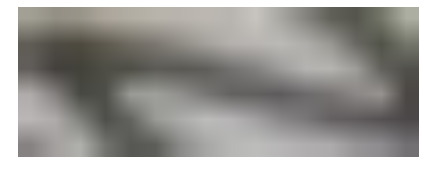

In [6]:
fig, ax = plt.subplots()
plot_sample(image, ax)
plt.tight_layout()

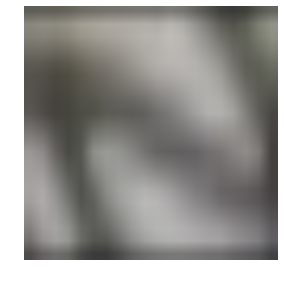

In [7]:
fig, ax = plt.subplots()
plot_sample(imageResized, ax)
plt.tight_layout()

### 똑같이 흐리긴한데, 크기가 정형하게 맞춰진 것을 확인할 수 있었다.
## sklearn.transform 안의 resize 함수로 이미지가 크던 작던 일정한 크기로 만들 수 있음을 확인하였다.

In [27]:
answer_df = pd.read_csv('trainLabels.csv')
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 2 columns):
ID       6283 non-null int64
Class    6283 non-null object
dtypes: int64(1), object(1)
memory usage: 98.2+ KB


In [28]:
answer_df[answer_df['ID'] == 262]

,ID,Class
261,262,N


### 그럼 dim == 2 인 데이터처리는 어떻게 해야할까

In [21]:
image = imread('train/2290.Bmp')
print(image.size)
print(image.ndim)
print(image.shape)
imageResized = resize(image, (20,20))
print('imageResized.size', imageResized.size)
print('imageResized.ndim', imageResized.ndim)
print('imageResized.shape', imageResized.shape)

740
2
(37, 20)
imageResized.size 400
imageResized.ndim 2
imageResized.shape (20, 20)


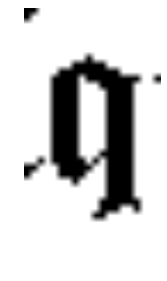

In [22]:
fig, ax = plt.subplots()
plot_sample(image, ax)
plt.tight_layout()

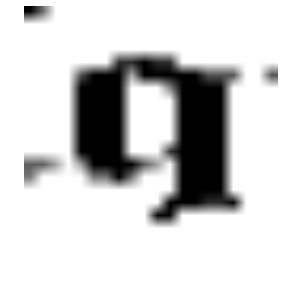

In [23]:
fig, ax = plt.subplots()
plot_sample(imageResized, ax)
plt.tight_layout()

### dim 2 짜리는 어떤식으로 처리를 해야할지 결정을 해야할 것 같다.
* 제거하고 트레이닝한다? => 만약 test 데이터안에 dim 2 짜리가 들어있다면 어떻게 해야하나?
* dim 3 로 강제 변환한다? => How ?

In [24]:
image = imread('train/2290.Bmp')
print(image.size)
print(image.ndim)
print(image.shape)
imageResized = resize(image, (20,20,3))
print('imageResized.size', imageResized.size)
print('imageResized.ndim', imageResized.ndim)
print('imageResized.shape', imageResized.shape)

740
2
(37, 20)
imageResized.size 1200
imageResized.ndim 3
imageResized.shape (20, 20, 3)


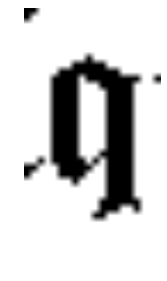

In [25]:
fig, ax = plt.subplots()
plot_sample(image, ax)
plt.tight_layout()

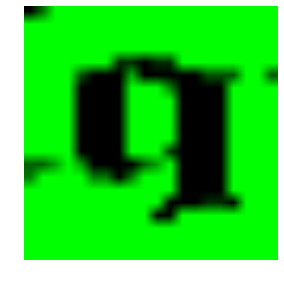

In [26]:
fig, ax = plt.subplots()
plot_sample(imageResized, ax)
plt.tight_layout()

### 강제로 변환을 하니까 변환이 되기는 된다. 다만 색깔이 왜 저렇게 되는지는 잘 모르겠다. 픽셀값을 뜯어봐야하나

In [12]:
img = Image.open("train/2290.Bmp")
print(img.size)
print(img.format)
print(img.mode)

(20, 37)
PNG
L


### 문제가 되는 타입을 PIL 의 Image 객체로 불러서 확인을 해보니까, mode == L 이라는 것으로 되어있다.

In [29]:
import os

In [36]:
if not os.path.exists("myTrainResized"):
    os.makedirs('myTrainResized')
    print("make myTrainResized dir")

trainFiles = glob.glob("train/*")
for i, nameFile in enumerate(trainFiles):
    print(nameFile)
    image = imread(nameFile)
    imageResized = resize(image, (20,20,3))
    newName = "/".join(nameFile.split("/")[:-1]) + "myTrainResized/" + nameFile.split("/")[-1]
#     print('nameFile.split("/")[:-1] : ', nameFile.split("/")[:-1])
#     print('nameFile.split("/")[-1] : ', nameFile.split("/")[-1])
    print("newName : ", newName)
    imsave ( newName, imageResized )

train/1.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1.Bmp
newName :  myTrainResized/1.Bmp
train/10.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/10.Bmp
newName :  myTrainResized/10.Bmp
train/100.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/100.Bmp
newName :  myTrainResized/100.Bmp
train/1000.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1000.Bmp
newName :  myTrainResized/1000.Bmp
train/1001.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1001.Bmp
newName :  myTrainResized/1001.Bmp
train/1002.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1002.Bmp
newName :  myTrainResized/1002.Bmp
train/1003.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1003.Bmp
newName :  myTrainResized/1003.Bmp
train/1004.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1004.Bmp
newName :  myTrainResized/1004.Bmp
train/1005.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1045.Bmp
newName :  myTrainResized/1045.Bmp
train/1046.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1046.Bmp
newName :  myTrainResized/1046.Bmp
train/1047.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1047.Bmp
newName :  myTrainResized/1047.Bmp
train/1048.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1048.Bmp
newName :  myTrainResized/1048.Bmp
train/1049.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1049.Bmp
newName :  myTrainResized/1049.Bmp
train/105.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/105.Bmp
newName :  myTrainResized/105.Bmp
train/1050.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1050.Bmp
newName :  myTrainResized/1050.Bmp
train/1051.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1051.Bmp
newName :  myTrainResized/1051.Bmp
train/1052.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/1084.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1084.Bmp
newName :  myTrainResized/1084.Bmp
train/1085.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1085.Bmp
newName :  myTrainResized/1085.Bmp
train/1086.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1086.Bmp
newName :  myTrainResized/1086.Bmp
train/1087.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1087.Bmp
newName :  myTrainResized/1087.Bmp
train/1088.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1088.Bmp
newName :  myTrainResized/1088.Bmp
train/1089.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1089.Bmp
newName :  myTrainResized/1089.Bmp
train/109.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/109.Bmp
newName :  myTrainResized/109.Bmp
train/1090.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1090.Bmp
newName :  myTrainResized/1090.Bmp
train/1091.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/1120.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1120.Bmp
newName :  myTrainResized/1120.Bmp
train/1121.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1121.Bmp
newName :  myTrainResized/1121.Bmp
train/1122.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1122.Bmp
newName :  myTrainResized/1122.Bmp
train/1123.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1123.Bmp
newName :  myTrainResized/1123.Bmp
train/1124.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1124.Bmp
newName :  myTrainResized/1124.Bmp
train/1125.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1125.Bmp
newName :  myTrainResized/1125.Bmp
train/1126.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1126.Bmp
newName :  myTrainResized/1126.Bmp
train/1127.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1127.Bmp
newName :  myTrainResized/1127.Bmp
train/11

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1155.Bmp
newName :  myTrainResized/1155.Bmp
train/1156.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1156.Bmp
newName :  myTrainResized/1156.Bmp
train/1157.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1157.Bmp
newName :  myTrainResized/1157.Bmp
train/1158.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1158.Bmp
newName :  myTrainResized/1158.Bmp
train/1159.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1159.Bmp
newName :  myTrainResized/1159.Bmp
train/116.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/116.Bmp
newName :  myTrainResized/116.Bmp
train/1160.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1160.Bmp
newName :  myTrainResized/1160.Bmp
train/1161.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1161.Bmp
newName :  myTrainResized/1161.Bmp
train/1162.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/1193.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1193.Bmp
newName :  myTrainResized/1193.Bmp
train/1194.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1194.Bmp
newName :  myTrainResized/1194.Bmp
train/1195.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1195.Bmp
newName :  myTrainResized/1195.Bmp
train/1196.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1196.Bmp
newName :  myTrainResized/1196.Bmp
train/1197.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1197.Bmp
newName :  myTrainResized/1197.Bmp
train/1198.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1198.Bmp
newName :  myTrainResized/1198.Bmp
train/1199.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1199.Bmp
newName :  myTrainResized/1199.Bmp
train/12.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/12.Bmp
newName :  myTrainResized/12.Bmp
train/120.Bmp


/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1208.Bmp
newName :  myTrainResized/1208.Bmp
train/1209.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1209.Bmp
newName :  myTrainResized/1209.Bmp
train/121.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/121.Bmp
newName :  myTrainResized/121.Bmp
train/1210.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1210.Bmp
newName :  myTrainResized/1210.Bmp
train/1211.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1211.Bmp
newName :  myTrainResized/1211.Bmp
train/1212.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1212.Bmp
newName :  myTrainResized/1212.Bmp
train/1213.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1213.Bmp
newName :  myTrainResized/1213.Bmp
train/1214.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1214.Bmp
newName :  myTrainResized/1214.Bmp
train/1215.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1233.Bmp
newName :  myTrainResized/1233.Bmp
train/1234.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1234.Bmp
newName :  myTrainResized/1234.Bmp
train/1235.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1235.Bmp
newName :  myTrainResized/1235.Bmp
train/1236.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1236.Bmp
newName :  myTrainResized/1236.Bmp
train/1237.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1237.Bmp
newName :  myTrainResized/1237.Bmp
train/1238.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1238.Bmp
newName :  myTrainResized/1238.Bmp
train/1239.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1239.Bmp
newName :  myTrainResized/1239.Bmp
train/124.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/124.Bmp
newName :  myTrainResized/124.Bmp
train/1240.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1255.Bmp
newName :  myTrainResized/1255.Bmp
train/1256.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1256.Bmp
newName :  myTrainResized/1256.Bmp
train/1257.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1257.Bmp
newName :  myTrainResized/1257.Bmp
train/1258.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1258.Bmp
newName :  myTrainResized/1258.Bmp
train/1259.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1259.Bmp
newName :  myTrainResized/1259.Bmp
train/126.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/126.Bmp
newName :  myTrainResized/126.Bmp
train/1260.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1260.Bmp
newName :  myTrainResized/1260.Bmp
train/1261.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1261.Bmp
newName :  myTrainResized/1261.Bmp
train/1262.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1285.Bmp
newName :  myTrainResized/1285.Bmp
train/1286.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1286.Bmp
newName :  myTrainResized/1286.Bmp
train/1287.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1287.Bmp
newName :  myTrainResized/1287.Bmp
train/1288.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1288.Bmp
newName :  myTrainResized/1288.Bmp
train/1289.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1289.Bmp
newName :  myTrainResized/1289.Bmp
train/129.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/129.Bmp
newName :  myTrainResized/129.Bmp
train/1290.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1290.Bmp
newName :  myTrainResized/1290.Bmp
train/1291.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1291.Bmp
newName :  myTrainResized/1291.Bmp
train/1292.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1308.Bmp
newName :  myTrainResized/1308.Bmp
train/1309.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1309.Bmp
newName :  myTrainResized/1309.Bmp
train/131.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/131.Bmp
newName :  myTrainResized/131.Bmp
train/1310.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1310.Bmp
newName :  myTrainResized/1310.Bmp
train/1311.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1311.Bmp
newName :  myTrainResized/1311.Bmp
train/1312.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1312.Bmp
newName :  myTrainResized/1312.Bmp
train/1313.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1313.Bmp
newName :  myTrainResized/1313.Bmp
train/1314.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1314.Bmp
newName :  myTrainResized/1314.Bmp
train/1315.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1345.Bmp
newName :  myTrainResized/1345.Bmp
train/1346.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1346.Bmp
newName :  myTrainResized/1346.Bmp
train/1347.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1347.Bmp
newName :  myTrainResized/1347.Bmp
train/1348.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1348.Bmp
newName :  myTrainResized/1348.Bmp
train/1349.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1349.Bmp
newName :  myTrainResized/1349.Bmp
train/135.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/135.Bmp
newName :  myTrainResized/135.Bmp
train/1350.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1350.Bmp
newName :  myTrainResized/1350.Bmp
train/1351.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1351.Bmp
newName :  myTrainResized/1351.Bmp
train/1352.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1371.Bmp
newName :  myTrainResized/1371.Bmp
train/1372.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1372.Bmp
newName :  myTrainResized/1372.Bmp
train/1373.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1373.Bmp
newName :  myTrainResized/1373.Bmp
train/1374.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1374.Bmp
newName :  myTrainResized/1374.Bmp
train/1375.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1375.Bmp
newName :  myTrainResized/1375.Bmp
train/1376.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1376.Bmp
newName :  myTrainResized/1376.Bmp
train/1377.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1377.Bmp
newName :  myTrainResized/1377.Bmp
train/1378.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1378.Bmp
newName :  myTrainResized/1378.Bmp
train/1379.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/140.Bmp
newName :  myTrainResized/140.Bmp
train/1400.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1400.Bmp
newName :  myTrainResized/1400.Bmp
train/1401.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1401.Bmp
newName :  myTrainResized/1401.Bmp
train/1402.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1402.Bmp
newName :  myTrainResized/1402.Bmp
train/1403.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1403.Bmp
newName :  myTrainResized/1403.Bmp
train/1404.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1404.Bmp
newName :  myTrainResized/1404.Bmp
train/1405.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1405.Bmp
newName :  myTrainResized/1405.Bmp
train/1406.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1406.Bmp
newName :  myTrainResized/1406.Bmp
train/1407.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1440.Bmp
newName :  myTrainResized/1440.Bmp
train/1441.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1441.Bmp
newName :  myTrainResized/1441.Bmp
train/1442.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1442.Bmp
newName :  myTrainResized/1442.Bmp
train/1443.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1443.Bmp
newName :  myTrainResized/1443.Bmp
train/1444.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1444.Bmp
newName :  myTrainResized/1444.Bmp
train/1445.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1445.Bmp
newName :  myTrainResized/1445.Bmp
train/1446.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1446.Bmp
newName :  myTrainResized/1446.Bmp
train/1447.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1447.Bmp
newName :  myTrainResized/1447.Bmp
train/1448.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1481.Bmp
newName :  myTrainResized/1481.Bmp
train/1482.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1482.Bmp
newName :  myTrainResized/1482.Bmp
train/1483.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1483.Bmp
newName :  myTrainResized/1483.Bmp
train/1484.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1484.Bmp
newName :  myTrainResized/1484.Bmp
train/1485.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1485.Bmp
newName :  myTrainResized/1485.Bmp
train/1486.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1486.Bmp
newName :  myTrainResized/1486.Bmp
train/1487.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1487.Bmp
newName :  myTrainResized/1487.Bmp
train/1488.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1488.Bmp
newName :  myTrainResized/1488.Bmp
train/1489.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1525.Bmp
newName :  myTrainResized/1525.Bmp
train/1526.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1526.Bmp
newName :  myTrainResized/1526.Bmp
train/1527.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1527.Bmp
newName :  myTrainResized/1527.Bmp
train/1528.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1528.Bmp
newName :  myTrainResized/1528.Bmp
train/1529.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1529.Bmp
newName :  myTrainResized/1529.Bmp
train/153.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/153.Bmp
newName :  myTrainResized/153.Bmp
train/1530.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1530.Bmp
newName :  myTrainResized/1530.Bmp
train/1531.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1531.Bmp
newName :  myTrainResized/1531.Bmp
train/1532.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/1573.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1573.Bmp
newName :  myTrainResized/1573.Bmp
train/1574.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1574.Bmp
newName :  myTrainResized/1574.Bmp
train/1575.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1575.Bmp
newName :  myTrainResized/1575.Bmp
train/1576.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1576.Bmp
newName :  myTrainResized/1576.Bmp
train/1577.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1577.Bmp
newName :  myTrainResized/1577.Bmp
train/1578.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1578.Bmp
newName :  myTrainResized/1578.Bmp
train/1579.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1579.Bmp
newName :  myTrainResized/1579.Bmp
train/158.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/158.Bmp
newName :  myTrainResized/158.Bmp
train/1580.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/163.Bmp
newName :  myTrainResized/163.Bmp
train/1630.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1630.Bmp
newName :  myTrainResized/1630.Bmp
train/1631.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1631.Bmp
newName :  myTrainResized/1631.Bmp
train/1632.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1632.Bmp
newName :  myTrainResized/1632.Bmp
train/1633.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1633.Bmp
newName :  myTrainResized/1633.Bmp
train/1634.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1634.Bmp
newName :  myTrainResized/1634.Bmp
train/1635.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1635.Bmp
newName :  myTrainResized/1635.Bmp
train/1636.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1636.Bmp
newName :  myTrainResized/1636.Bmp
train/1637.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1685.Bmp
newName :  myTrainResized/1685.Bmp
train/1686.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1686.Bmp
newName :  myTrainResized/1686.Bmp
train/1687.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1687.Bmp
newName :  myTrainResized/1687.Bmp
train/1688.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1688.Bmp
newName :  myTrainResized/1688.Bmp
train/1689.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1689.Bmp
newName :  myTrainResized/1689.Bmp
train/169.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/169.Bmp
newName :  myTrainResized/169.Bmp
train/1690.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1690.Bmp
newName :  myTrainResized/1690.Bmp
train/1691.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1691.Bmp
newName :  myTrainResized/1691.Bmp
train/1692.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1728.Bmp
newName :  myTrainResized/1728.Bmp
train/1729.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1729.Bmp
newName :  myTrainResized/1729.Bmp
train/173.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/173.Bmp
newName :  myTrainResized/173.Bmp
train/1730.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1730.Bmp
newName :  myTrainResized/1730.Bmp
train/1731.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1731.Bmp
newName :  myTrainResized/1731.Bmp
train/1732.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1732.Bmp
newName :  myTrainResized/1732.Bmp
train/1733.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1733.Bmp
newName :  myTrainResized/1733.Bmp
train/1734.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1734.Bmp
newName :  myTrainResized/1734.Bmp
train/1735.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1772.Bmp
newName :  myTrainResized/1772.Bmp
train/1773.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1773.Bmp
newName :  myTrainResized/1773.Bmp
train/1774.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1774.Bmp
newName :  myTrainResized/1774.Bmp
train/1775.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1775.Bmp
newName :  myTrainResized/1775.Bmp
train/1776.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1776.Bmp
newName :  myTrainResized/1776.Bmp
train/1777.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1777.Bmp
newName :  myTrainResized/1777.Bmp
train/1778.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1778.Bmp
newName :  myTrainResized/1778.Bmp
train/1779.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1779.Bmp
newName :  myTrainResized/1779.Bmp
train/178.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1810.Bmp
newName :  myTrainResized/1810.Bmp
train/1811.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1811.Bmp
newName :  myTrainResized/1811.Bmp
train/1812.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1812.Bmp
newName :  myTrainResized/1812.Bmp
train/1813.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1813.Bmp
newName :  myTrainResized/1813.Bmp
train/1814.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1814.Bmp
newName :  myTrainResized/1814.Bmp
train/1815.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1815.Bmp
newName :  myTrainResized/1815.Bmp
train/1816.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1816.Bmp
newName :  myTrainResized/1816.Bmp
train/1817.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1817.Bmp
newName :  myTrainResized/1817.Bmp
train/1818.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1842.Bmp
newName :  myTrainResized/1842.Bmp
train/1843.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1843.Bmp
newName :  myTrainResized/1843.Bmp
train/1844.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1844.Bmp
newName :  myTrainResized/1844.Bmp
train/1845.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1845.Bmp
newName :  myTrainResized/1845.Bmp
train/1846.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1846.Bmp
newName :  myTrainResized/1846.Bmp
train/1847.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1847.Bmp
newName :  myTrainResized/1847.Bmp
train/1848.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1848.Bmp
newName :  myTrainResized/1848.Bmp
train/1849.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1849.Bmp
newName :  myTrainResized/1849.Bmp
train/185.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1863.Bmp
newName :  myTrainResized/1863.Bmp
train/1864.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1864.Bmp
newName :  myTrainResized/1864.Bmp
train/1865.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1865.Bmp
newName :  myTrainResized/1865.Bmp
train/1866.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1866.Bmp
newName :  myTrainResized/1866.Bmp
train/1867.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1867.Bmp
newName :  myTrainResized/1867.Bmp
train/1868.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1868.Bmp
newName :  myTrainResized/1868.Bmp
train/1869.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1869.Bmp
newName :  myTrainResized/1869.Bmp
train/187.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/187.Bmp
newName :  myTrainResized/187.Bmp
train/1870.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1910.Bmp
newName :  myTrainResized/1910.Bmp
train/1911.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1911.Bmp
newName :  myTrainResized/1911.Bmp
train/1912.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1912.Bmp
newName :  myTrainResized/1912.Bmp
train/1913.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1913.Bmp
newName :  myTrainResized/1913.Bmp
train/1914.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1914.Bmp
newName :  myTrainResized/1914.Bmp
train/1915.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1915.Bmp
newName :  myTrainResized/1915.Bmp
train/1916.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1916.Bmp
newName :  myTrainResized/1916.Bmp
train/1917.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1917.Bmp
newName :  myTrainResized/1917.Bmp
train/1918.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/195.Bmp
newName :  myTrainResized/195.Bmp
train/1950.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1950.Bmp
newName :  myTrainResized/1950.Bmp
train/1951.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1951.Bmp
newName :  myTrainResized/1951.Bmp
train/1952.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1952.Bmp
newName :  myTrainResized/1952.Bmp
train/1953.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1953.Bmp
newName :  myTrainResized/1953.Bmp
train/1954.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1954.Bmp
newName :  myTrainResized/1954.Bmp
train/1955.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1955.Bmp
newName :  myTrainResized/1955.Bmp
train/1956.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1956.Bmp
newName :  myTrainResized/1956.Bmp
train/1957.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1986.Bmp
newName :  myTrainResized/1986.Bmp
train/1987.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1987.Bmp
newName :  myTrainResized/1987.Bmp
train/1988.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1988.Bmp
newName :  myTrainResized/1988.Bmp
train/1989.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1989.Bmp
newName :  myTrainResized/1989.Bmp
train/199.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/199.Bmp
newName :  myTrainResized/199.Bmp
train/1990.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1990.Bmp
newName :  myTrainResized/1990.Bmp
train/1991.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1991.Bmp
newName :  myTrainResized/1991.Bmp
train/1992.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/1992.Bmp
newName :  myTrainResized/1992.Bmp
train/1993.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/2023.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2023.Bmp
newName :  myTrainResized/2023.Bmp
train/2024.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2024.Bmp
newName :  myTrainResized/2024.Bmp
train/2025.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2025.Bmp
newName :  myTrainResized/2025.Bmp
train/2026.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2026.Bmp
newName :  myTrainResized/2026.Bmp
train/2027.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2027.Bmp
newName :  myTrainResized/2027.Bmp
train/2028.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2028.Bmp
newName :  myTrainResized/2028.Bmp
train/2029.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2029.Bmp
newName :  myTrainResized/2029.Bmp
train/203.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/203.Bmp
newName :  myTrainResized/203.Bmp
train/2030.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2053.Bmp
newName :  myTrainResized/2053.Bmp
train/2054.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2054.Bmp
newName :  myTrainResized/2054.Bmp
train/2055.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2055.Bmp
newName :  myTrainResized/2055.Bmp
train/2056.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2056.Bmp
newName :  myTrainResized/2056.Bmp
train/2057.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2057.Bmp
newName :  myTrainResized/2057.Bmp
train/2058.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2058.Bmp
newName :  myTrainResized/2058.Bmp
train/2059.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2059.Bmp
newName :  myTrainResized/2059.Bmp
train/206.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/206.Bmp
newName :  myTrainResized/206.Bmp
train/2060.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2091.Bmp
newName :  myTrainResized/2091.Bmp
train/2092.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2092.Bmp
newName :  myTrainResized/2092.Bmp
train/2093.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2093.Bmp
newName :  myTrainResized/2093.Bmp
train/2094.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2094.Bmp
newName :  myTrainResized/2094.Bmp
train/2095.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2095.Bmp
newName :  myTrainResized/2095.Bmp
train/2096.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2096.Bmp
newName :  myTrainResized/2096.Bmp
train/2097.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2097.Bmp
newName :  myTrainResized/2097.Bmp
train/2098.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2098.Bmp
newName :  myTrainResized/2098.Bmp
train/2099.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2138.Bmp
newName :  myTrainResized/2138.Bmp
train/2139.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2139.Bmp
newName :  myTrainResized/2139.Bmp
train/214.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/214.Bmp
newName :  myTrainResized/214.Bmp
train/2140.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2140.Bmp
newName :  myTrainResized/2140.Bmp
train/2141.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2141.Bmp
newName :  myTrainResized/2141.Bmp
train/2142.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2142.Bmp
newName :  myTrainResized/2142.Bmp
train/2143.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2143.Bmp
newName :  myTrainResized/2143.Bmp
train/2144.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2144.Bmp
newName :  myTrainResized/2144.Bmp
train/2145.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/2183.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2183.Bmp
newName :  myTrainResized/2183.Bmp
train/2184.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2184.Bmp
newName :  myTrainResized/2184.Bmp
train/2185.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2185.Bmp
newName :  myTrainResized/2185.Bmp
train/2186.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2186.Bmp
newName :  myTrainResized/2186.Bmp
train/2187.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2187.Bmp
newName :  myTrainResized/2187.Bmp
train/2188.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2188.Bmp
newName :  myTrainResized/2188.Bmp
train/2189.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2189.Bmp
newName :  myTrainResized/2189.Bmp
train/219.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/219.Bmp
newName :  myTrainResized/219.Bmp
train/2190.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/225.Bmp
newName :  myTrainResized/225.Bmp
train/2250.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2250.Bmp
newName :  myTrainResized/2250.Bmp
train/2251.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2251.Bmp
newName :  myTrainResized/2251.Bmp
train/2252.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2252.Bmp
newName :  myTrainResized/2252.Bmp
train/2253.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2253.Bmp
newName :  myTrainResized/2253.Bmp
train/2254.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2254.Bmp
newName :  myTrainResized/2254.Bmp
train/2255.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2255.Bmp
newName :  myTrainResized/2255.Bmp
train/2256.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2256.Bmp
newName :  myTrainResized/2256.Bmp
train/2257.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2268.Bmp
newName :  myTrainResized/2268.Bmp
train/2269.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2269.Bmp
newName :  myTrainResized/2269.Bmp
train/227.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/227.Bmp
newName :  myTrainResized/227.Bmp
train/2270.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2270.Bmp
newName :  myTrainResized/2270.Bmp
train/2271.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2271.Bmp
newName :  myTrainResized/2271.Bmp
train/2272.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2272.Bmp
newName :  myTrainResized/2272.Bmp
train/2273.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2273.Bmp
newName :  myTrainResized/2273.Bmp
train/2274.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2274.Bmp
newName :  myTrainResized/2274.Bmp
train/2275.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2296.Bmp
newName :  myTrainResized/2296.Bmp
train/2297.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2297.Bmp
newName :  myTrainResized/2297.Bmp
train/2298.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2298.Bmp
newName :  myTrainResized/2298.Bmp
train/2299.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2299.Bmp
newName :  myTrainResized/2299.Bmp
train/23.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/23.Bmp
newName :  myTrainResized/23.Bmp
train/230.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/230.Bmp
newName :  myTrainResized/230.Bmp
train/2300.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2300.Bmp
newName :  myTrainResized/2300.Bmp
train/2301.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2301.Bmp
newName :  myTrainResized/2301.Bmp
train/2302.Bmp
nameFile.split("\

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/2333.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2333.Bmp
newName :  myTrainResized/2333.Bmp
train/2334.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2334.Bmp
newName :  myTrainResized/2334.Bmp
train/2335.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2335.Bmp
newName :  myTrainResized/2335.Bmp
train/2336.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2336.Bmp
newName :  myTrainResized/2336.Bmp
train/2337.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2337.Bmp
newName :  myTrainResized/2337.Bmp
train/2338.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2338.Bmp
newName :  myTrainResized/2338.Bmp
train/2339.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2339.Bmp
newName :  myTrainResized/2339.Bmp
train/234.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/234.Bmp
newName :  myTrainResized/234.Bmp
train/2340.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2353.Bmp
newName :  myTrainResized/2353.Bmp
train/2354.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2354.Bmp
newName :  myTrainResized/2354.Bmp
train/2355.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2355.Bmp
newName :  myTrainResized/2355.Bmp
train/2356.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2356.Bmp
newName :  myTrainResized/2356.Bmp
train/2357.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2357.Bmp
newName :  myTrainResized/2357.Bmp
train/2358.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2358.Bmp
newName :  myTrainResized/2358.Bmp
train/2359.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2359.Bmp
newName :  myTrainResized/2359.Bmp
train/236.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/236.Bmp
newName :  myTrainResized/236.Bmp
train/2360.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/2388.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2388.Bmp
newName :  myTrainResized/2388.Bmp
train/2389.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2389.Bmp
newName :  myTrainResized/2389.Bmp
train/239.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/239.Bmp
newName :  myTrainResized/239.Bmp
train/2390.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2390.Bmp
newName :  myTrainResized/2390.Bmp
train/2391.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2391.Bmp
newName :  myTrainResized/2391.Bmp
train/2392.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2392.Bmp
newName :  myTrainResized/2392.Bmp
train/2393.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2393.Bmp
newName :  myTrainResized/2393.Bmp
train/2394.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2394.Bmp
newName :  myTrainResized/2394.Bmp
train/2395.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/242.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/242.Bmp
newName :  myTrainResized/242.Bmp
train/2420.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2420.Bmp
newName :  myTrainResized/2420.Bmp
train/2421.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2421.Bmp
newName :  myTrainResized/2421.Bmp
train/2422.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2422.Bmp
newName :  myTrainResized/2422.Bmp
train/2423.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2423.Bmp
newName :  myTrainResized/2423.Bmp
train/2424.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2424.Bmp
newName :  myTrainResized/2424.Bmp
train/2425.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2425.Bmp
newName :  myTrainResized/2425.Bmp
train/2426.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2426.Bmp
newName :  myTrainResized/2426.Bmp
train/2427.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2489.Bmp
newName :  myTrainResized/2489.Bmp
train/249.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/249.Bmp
newName :  myTrainResized/249.Bmp
train/2490.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2490.Bmp
newName :  myTrainResized/2490.Bmp
train/2491.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2491.Bmp
newName :  myTrainResized/2491.Bmp
train/2492.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2492.Bmp
newName :  myTrainResized/2492.Bmp
train/2493.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2493.Bmp
newName :  myTrainResized/2493.Bmp
train/2494.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2494.Bmp
newName :  myTrainResized/2494.Bmp
train/2495.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2495.Bmp
newName :  myTrainResized/2495.Bmp
train/2496.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2543.Bmp
newName :  myTrainResized/2543.Bmp
train/2544.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2544.Bmp
newName :  myTrainResized/2544.Bmp
train/2545.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2545.Bmp
newName :  myTrainResized/2545.Bmp
train/2546.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2546.Bmp
newName :  myTrainResized/2546.Bmp
train/2547.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2547.Bmp
newName :  myTrainResized/2547.Bmp
train/2548.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2548.Bmp
newName :  myTrainResized/2548.Bmp
train/2549.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2549.Bmp
newName :  myTrainResized/2549.Bmp
train/255.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/255.Bmp
newName :  myTrainResized/255.Bmp
train/2550.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2596.Bmp
newName :  myTrainResized/2596.Bmp
train/2597.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2597.Bmp
newName :  myTrainResized/2597.Bmp
train/2598.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2598.Bmp
newName :  myTrainResized/2598.Bmp
train/2599.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2599.Bmp
newName :  myTrainResized/2599.Bmp
train/26.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/26.Bmp
newName :  myTrainResized/26.Bmp
train/260.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/260.Bmp
newName :  myTrainResized/260.Bmp
train/2600.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2600.Bmp
newName :  myTrainResized/2600.Bmp
train/2601.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2601.Bmp
newName :  myTrainResized/2601.Bmp
train/2602.Bmp
nameFile.split("\

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2649.Bmp
newName :  myTrainResized/2649.Bmp
train/265.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/265.Bmp
newName :  myTrainResized/265.Bmp
train/2650.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2650.Bmp
newName :  myTrainResized/2650.Bmp
train/2651.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2651.Bmp
newName :  myTrainResized/2651.Bmp
train/2652.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2652.Bmp
newName :  myTrainResized/2652.Bmp
train/2653.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2653.Bmp
newName :  myTrainResized/2653.Bmp
train/2654.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2654.Bmp
newName :  myTrainResized/2654.Bmp
train/2655.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2655.Bmp
newName :  myTrainResized/2655.Bmp
train/2656.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/270.Bmp
newName :  myTrainResized/270.Bmp
train/2700.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2700.Bmp
newName :  myTrainResized/2700.Bmp
train/2701.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2701.Bmp
newName :  myTrainResized/2701.Bmp
train/2702.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2702.Bmp
newName :  myTrainResized/2702.Bmp
train/2703.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2703.Bmp
newName :  myTrainResized/2703.Bmp
train/2704.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2704.Bmp
newName :  myTrainResized/2704.Bmp
train/2705.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2705.Bmp
newName :  myTrainResized/2705.Bmp
train/2706.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2706.Bmp
newName :  myTrainResized/2706.Bmp
train/2707.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2746.Bmp
newName :  myTrainResized/2746.Bmp
train/2747.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2747.Bmp
newName :  myTrainResized/2747.Bmp
train/2748.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2748.Bmp
newName :  myTrainResized/2748.Bmp
train/2749.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2749.Bmp
newName :  myTrainResized/2749.Bmp
train/275.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/275.Bmp
newName :  myTrainResized/275.Bmp
train/2750.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2750.Bmp
newName :  myTrainResized/2750.Bmp
train/2751.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2751.Bmp
newName :  myTrainResized/2751.Bmp
train/2752.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2752.Bmp
newName :  myTrainResized/2752.Bmp
train/2753.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/278.Bmp
newName :  myTrainResized/278.Bmp
train/2780.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2780.Bmp
newName :  myTrainResized/2780.Bmp
train/2781.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2781.Bmp
newName :  myTrainResized/2781.Bmp
train/2782.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2782.Bmp
newName :  myTrainResized/2782.Bmp
train/2783.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2783.Bmp
newName :  myTrainResized/2783.Bmp
train/2784.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2784.Bmp
newName :  myTrainResized/2784.Bmp
train/2785.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2785.Bmp
newName :  myTrainResized/2785.Bmp
train/2786.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2786.Bmp
newName :  myTrainResized/2786.Bmp
train/2787.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2823.Bmp
newName :  myTrainResized/2823.Bmp
train/2824.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2824.Bmp
newName :  myTrainResized/2824.Bmp
train/2825.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2825.Bmp
newName :  myTrainResized/2825.Bmp
train/2826.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2826.Bmp
newName :  myTrainResized/2826.Bmp
train/2827.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2827.Bmp
newName :  myTrainResized/2827.Bmp
train/2828.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2828.Bmp
newName :  myTrainResized/2828.Bmp
train/2829.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2829.Bmp
newName :  myTrainResized/2829.Bmp
train/283.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/283.Bmp
newName :  myTrainResized/283.Bmp
train/2830.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2868.Bmp
newName :  myTrainResized/2868.Bmp
train/2869.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2869.Bmp
newName :  myTrainResized/2869.Bmp
train/287.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/287.Bmp
newName :  myTrainResized/287.Bmp
train/2870.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2870.Bmp
newName :  myTrainResized/2870.Bmp
train/2871.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2871.Bmp
newName :  myTrainResized/2871.Bmp
train/2872.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2872.Bmp
newName :  myTrainResized/2872.Bmp
train/2873.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2873.Bmp
newName :  myTrainResized/2873.Bmp
train/2874.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2874.Bmp
newName :  myTrainResized/2874.Bmp
train/2875.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/2918.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2918.Bmp
newName :  myTrainResized/2918.Bmp
train/2919.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2919.Bmp
newName :  myTrainResized/2919.Bmp
train/292.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/292.Bmp
newName :  myTrainResized/292.Bmp
train/2920.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2920.Bmp
newName :  myTrainResized/2920.Bmp
train/2921.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2921.Bmp
newName :  myTrainResized/2921.Bmp
train/2922.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2922.Bmp
newName :  myTrainResized/2922.Bmp
train/2923.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2923.Bmp
newName :  myTrainResized/2923.Bmp
train/2924.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2924.Bmp
newName :  myTrainResized/2924.Bmp
train/2925.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2959.Bmp
newName :  myTrainResized/2959.Bmp
train/296.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/296.Bmp
newName :  myTrainResized/296.Bmp
train/2960.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2960.Bmp
newName :  myTrainResized/2960.Bmp
train/2961.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2961.Bmp
newName :  myTrainResized/2961.Bmp
train/2962.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2962.Bmp
newName :  myTrainResized/2962.Bmp
train/2963.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2963.Bmp
newName :  myTrainResized/2963.Bmp
train/2964.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2964.Bmp
newName :  myTrainResized/2964.Bmp
train/2965.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/2965.Bmp
newName :  myTrainResized/2965.Bmp
train/2966.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/301.Bmp
newName :  myTrainResized/301.Bmp
train/3010.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3010.Bmp
newName :  myTrainResized/3010.Bmp
train/3011.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3011.Bmp
newName :  myTrainResized/3011.Bmp
train/3012.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3012.Bmp
newName :  myTrainResized/3012.Bmp
train/3013.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3013.Bmp
newName :  myTrainResized/3013.Bmp
train/3014.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3014.Bmp
newName :  myTrainResized/3014.Bmp
train/3015.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3015.Bmp
newName :  myTrainResized/3015.Bmp
train/3016.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3016.Bmp
newName :  myTrainResized/3016.Bmp
train/3017.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3053.Bmp
newName :  myTrainResized/3053.Bmp
train/3054.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3054.Bmp
newName :  myTrainResized/3054.Bmp
train/3055.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3055.Bmp
newName :  myTrainResized/3055.Bmp
train/3056.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3056.Bmp
newName :  myTrainResized/3056.Bmp
train/3057.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3057.Bmp
newName :  myTrainResized/3057.Bmp
train/3058.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3058.Bmp
newName :  myTrainResized/3058.Bmp
train/3059.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3059.Bmp
newName :  myTrainResized/3059.Bmp
train/306.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/306.Bmp
newName :  myTrainResized/306.Bmp
train/3060.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3104.Bmp
newName :  myTrainResized/3104.Bmp
train/3105.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3105.Bmp
newName :  myTrainResized/3105.Bmp
train/3106.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3106.Bmp
newName :  myTrainResized/3106.Bmp
train/3107.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3107.Bmp
newName :  myTrainResized/3107.Bmp
train/3108.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3108.Bmp
newName :  myTrainResized/3108.Bmp
train/3109.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3109.Bmp
newName :  myTrainResized/3109.Bmp
train/311.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/311.Bmp
newName :  myTrainResized/311.Bmp
train/3110.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3110.Bmp
newName :  myTrainResized/3110.Bmp
train/3111.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3136.Bmp
newName :  myTrainResized/3136.Bmp
train/3137.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3137.Bmp
newName :  myTrainResized/3137.Bmp
train/3138.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3138.Bmp
newName :  myTrainResized/3138.Bmp
train/3139.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3139.Bmp
newName :  myTrainResized/3139.Bmp
train/314.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/314.Bmp
newName :  myTrainResized/314.Bmp
train/3140.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3140.Bmp
newName :  myTrainResized/3140.Bmp
train/3141.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3141.Bmp
newName :  myTrainResized/3141.Bmp
train/3142.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3142.Bmp
newName :  myTrainResized/3142.Bmp
train/3143.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3181.Bmp
newName :  myTrainResized/3181.Bmp
train/3182.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3182.Bmp
newName :  myTrainResized/3182.Bmp
train/3183.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3183.Bmp
newName :  myTrainResized/3183.Bmp
train/3184.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3184.Bmp
newName :  myTrainResized/3184.Bmp
train/3185.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3185.Bmp
newName :  myTrainResized/3185.Bmp
train/3186.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3186.Bmp
newName :  myTrainResized/3186.Bmp
train/3187.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3187.Bmp
newName :  myTrainResized/3187.Bmp
train/3188.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3188.Bmp
newName :  myTrainResized/3188.Bmp
train/3189.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3232.Bmp
newName :  myTrainResized/3232.Bmp
train/3233.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3233.Bmp
newName :  myTrainResized/3233.Bmp
train/3234.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3234.Bmp
newName :  myTrainResized/3234.Bmp
train/3235.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3235.Bmp
newName :  myTrainResized/3235.Bmp
train/3236.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3236.Bmp
newName :  myTrainResized/3236.Bmp
train/3237.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3237.Bmp
newName :  myTrainResized/3237.Bmp
train/3238.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3238.Bmp
newName :  myTrainResized/3238.Bmp
train/3239.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3239.Bmp
newName :  myTrainResized/3239.Bmp
train/324.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/327.Bmp
newName :  myTrainResized/327.Bmp
train/3270.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3270.Bmp
newName :  myTrainResized/3270.Bmp
train/3271.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3271.Bmp
newName :  myTrainResized/3271.Bmp
train/3272.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3272.Bmp
newName :  myTrainResized/3272.Bmp
train/3273.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3273.Bmp
newName :  myTrainResized/3273.Bmp
train/3274.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3274.Bmp
newName :  myTrainResized/3274.Bmp
train/3275.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3275.Bmp
newName :  myTrainResized/3275.Bmp
train/3276.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3276.Bmp
newName :  myTrainResized/3276.Bmp
train/3277.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/3308.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3308.Bmp
newName :  myTrainResized/3308.Bmp
train/3309.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3309.Bmp
newName :  myTrainResized/3309.Bmp
train/331.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/331.Bmp
newName :  myTrainResized/331.Bmp
train/3310.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3310.Bmp
newName :  myTrainResized/3310.Bmp
train/3311.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3311.Bmp
newName :  myTrainResized/3311.Bmp
train/3312.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3312.Bmp
newName :  myTrainResized/3312.Bmp
train/3313.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3313.Bmp
newName :  myTrainResized/3313.Bmp
train/3314.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3314.Bmp
newName :  myTrainResized/3314.Bmp
train/3315.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3354.Bmp
newName :  myTrainResized/3354.Bmp
train/3355.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3355.Bmp
newName :  myTrainResized/3355.Bmp
train/3356.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3356.Bmp
newName :  myTrainResized/3356.Bmp
train/3357.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3357.Bmp
newName :  myTrainResized/3357.Bmp
train/3358.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3358.Bmp
newName :  myTrainResized/3358.Bmp
train/3359.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3359.Bmp
newName :  myTrainResized/3359.Bmp
train/336.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/336.Bmp
newName :  myTrainResized/336.Bmp
train/3360.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3360.Bmp
newName :  myTrainResized/3360.Bmp
train/3361.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/340.Bmp
newName :  myTrainResized/340.Bmp
train/3400.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3400.Bmp
newName :  myTrainResized/3400.Bmp
train/3401.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3401.Bmp
newName :  myTrainResized/3401.Bmp
train/3402.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3402.Bmp
newName :  myTrainResized/3402.Bmp
train/3403.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3403.Bmp
newName :  myTrainResized/3403.Bmp
train/3404.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3404.Bmp
newName :  myTrainResized/3404.Bmp
train/3405.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3405.Bmp
newName :  myTrainResized/3405.Bmp
train/3406.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3406.Bmp
newName :  myTrainResized/3406.Bmp
train/3407.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3453.Bmp
newName :  myTrainResized/3453.Bmp
train/3454.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3454.Bmp
newName :  myTrainResized/3454.Bmp
train/3455.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3455.Bmp
newName :  myTrainResized/3455.Bmp
train/3456.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3456.Bmp
newName :  myTrainResized/3456.Bmp
train/3457.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3457.Bmp
newName :  myTrainResized/3457.Bmp
train/3458.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3458.Bmp
newName :  myTrainResized/3458.Bmp
train/3459.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3459.Bmp
newName :  myTrainResized/3459.Bmp
train/346.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/346.Bmp
newName :  myTrainResized/346.Bmp
train/3460.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3488.Bmp
newName :  myTrainResized/3488.Bmp
train/3489.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3489.Bmp
newName :  myTrainResized/3489.Bmp
train/349.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/349.Bmp
newName :  myTrainResized/349.Bmp
train/3490.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3490.Bmp
newName :  myTrainResized/3490.Bmp
train/3491.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3491.Bmp
newName :  myTrainResized/3491.Bmp
train/3492.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3492.Bmp
newName :  myTrainResized/3492.Bmp
train/3493.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3493.Bmp
newName :  myTrainResized/3493.Bmp
train/3494.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3494.Bmp
newName :  myTrainResized/3494.Bmp
train/3495.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3534.Bmp
newName :  myTrainResized/3534.Bmp
train/3535.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3535.Bmp
newName :  myTrainResized/3535.Bmp
train/3536.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3536.Bmp
newName :  myTrainResized/3536.Bmp
train/3537.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3537.Bmp
newName :  myTrainResized/3537.Bmp
train/3538.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3538.Bmp
newName :  myTrainResized/3538.Bmp
train/3539.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3539.Bmp
newName :  myTrainResized/3539.Bmp
train/354.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/354.Bmp
newName :  myTrainResized/354.Bmp
train/3540.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3540.Bmp
newName :  myTrainResized/3540.Bmp
train/3541.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3569.Bmp
newName :  myTrainResized/3569.Bmp
train/357.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/357.Bmp
newName :  myTrainResized/357.Bmp
train/3570.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3570.Bmp
newName :  myTrainResized/3570.Bmp
train/3571.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3571.Bmp
newName :  myTrainResized/3571.Bmp
train/3572.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3572.Bmp
newName :  myTrainResized/3572.Bmp
train/3573.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3573.Bmp
newName :  myTrainResized/3573.Bmp
train/3574.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3574.Bmp
newName :  myTrainResized/3574.Bmp
train/3575.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3575.Bmp
newName :  myTrainResized/3575.Bmp
train/3576.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3609.Bmp
newName :  myTrainResized/3609.Bmp
train/361.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/361.Bmp
newName :  myTrainResized/361.Bmp
train/3610.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3610.Bmp
newName :  myTrainResized/3610.Bmp
train/3611.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3611.Bmp
newName :  myTrainResized/3611.Bmp
train/3612.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3612.Bmp
newName :  myTrainResized/3612.Bmp
train/3613.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3613.Bmp
newName :  myTrainResized/3613.Bmp
train/3614.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3614.Bmp
newName :  myTrainResized/3614.Bmp
train/3615.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3615.Bmp
newName :  myTrainResized/3615.Bmp
train/3616.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3657.Bmp
newName :  myTrainResized/3657.Bmp
train/3658.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3658.Bmp
newName :  myTrainResized/3658.Bmp
train/3659.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3659.Bmp
newName :  myTrainResized/3659.Bmp
train/366.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/366.Bmp
newName :  myTrainResized/366.Bmp
train/3660.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3660.Bmp
newName :  myTrainResized/3660.Bmp
train/3661.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3661.Bmp
newName :  myTrainResized/3661.Bmp
train/3662.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3662.Bmp
newName :  myTrainResized/3662.Bmp
train/3663.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3663.Bmp
newName :  myTrainResized/3663.Bmp
train/3664.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3708.Bmp
newName :  myTrainResized/3708.Bmp
train/3709.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3709.Bmp
newName :  myTrainResized/3709.Bmp
train/371.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/371.Bmp
newName :  myTrainResized/371.Bmp
train/3710.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3710.Bmp
newName :  myTrainResized/3710.Bmp
train/3711.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3711.Bmp
newName :  myTrainResized/3711.Bmp
train/3712.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3712.Bmp
newName :  myTrainResized/3712.Bmp
train/3713.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3713.Bmp
newName :  myTrainResized/3713.Bmp
train/3714.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3714.Bmp
newName :  myTrainResized/3714.Bmp
train/3715.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3766.Bmp
newName :  myTrainResized/3766.Bmp
train/3767.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3767.Bmp
newName :  myTrainResized/3767.Bmp
train/3768.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3768.Bmp
newName :  myTrainResized/3768.Bmp
train/3769.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3769.Bmp
newName :  myTrainResized/3769.Bmp
train/377.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/377.Bmp
newName :  myTrainResized/377.Bmp
train/3770.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3770.Bmp
newName :  myTrainResized/3770.Bmp
train/3771.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3771.Bmp
newName :  myTrainResized/3771.Bmp
train/3772.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3772.Bmp
newName :  myTrainResized/3772.Bmp
train/3773.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/381.Bmp
newName :  myTrainResized/381.Bmp
train/3810.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3810.Bmp
newName :  myTrainResized/3810.Bmp
train/3811.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3811.Bmp
newName :  myTrainResized/3811.Bmp
train/3812.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3812.Bmp
newName :  myTrainResized/3812.Bmp
train/3813.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3813.Bmp
newName :  myTrainResized/3813.Bmp
train/3814.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3814.Bmp
newName :  myTrainResized/3814.Bmp
train/3815.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3815.Bmp
newName :  myTrainResized/3815.Bmp
train/3816.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3816.Bmp
newName :  myTrainResized/3816.Bmp
train/3817.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3860.Bmp
newName :  myTrainResized/3860.Bmp
train/3861.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3861.Bmp
newName :  myTrainResized/3861.Bmp
train/3862.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3862.Bmp
newName :  myTrainResized/3862.Bmp
train/3863.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3863.Bmp
newName :  myTrainResized/3863.Bmp
train/3864.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3864.Bmp
newName :  myTrainResized/3864.Bmp
train/3865.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3865.Bmp
newName :  myTrainResized/3865.Bmp
train/3866.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3866.Bmp
newName :  myTrainResized/3866.Bmp
train/3867.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3867.Bmp
newName :  myTrainResized/3867.Bmp
train/3868.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3906.Bmp
newName :  myTrainResized/3906.Bmp
train/3907.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3907.Bmp
newName :  myTrainResized/3907.Bmp
train/3908.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3908.Bmp
newName :  myTrainResized/3908.Bmp
train/3909.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3909.Bmp
newName :  myTrainResized/3909.Bmp
train/391.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/391.Bmp
newName :  myTrainResized/391.Bmp
train/3910.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3910.Bmp
newName :  myTrainResized/3910.Bmp
train/3911.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3911.Bmp
newName :  myTrainResized/3911.Bmp
train/3912.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3912.Bmp
newName :  myTrainResized/3912.Bmp
train/3913.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/396.Bmp
newName :  myTrainResized/396.Bmp
train/3960.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3960.Bmp
newName :  myTrainResized/3960.Bmp
train/3961.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3961.Bmp
newName :  myTrainResized/3961.Bmp
train/3962.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3962.Bmp
newName :  myTrainResized/3962.Bmp
train/3963.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3963.Bmp
newName :  myTrainResized/3963.Bmp
train/3964.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3964.Bmp
newName :  myTrainResized/3964.Bmp
train/3965.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3965.Bmp
newName :  myTrainResized/3965.Bmp
train/3966.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/3966.Bmp
newName :  myTrainResized/3966.Bmp
train/3967.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4004.Bmp
newName :  myTrainResized/4004.Bmp
train/4005.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4005.Bmp
newName :  myTrainResized/4005.Bmp
train/4006.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4006.Bmp
newName :  myTrainResized/4006.Bmp
train/4007.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4007.Bmp
newName :  myTrainResized/4007.Bmp
train/4008.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4008.Bmp
newName :  myTrainResized/4008.Bmp
train/4009.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4009.Bmp
newName :  myTrainResized/4009.Bmp
train/401.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/401.Bmp
newName :  myTrainResized/401.Bmp
train/4010.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4010.Bmp
newName :  myTrainResized/4010.Bmp
train/4011.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4059.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4059.Bmp
newName :  myTrainResized/4059.Bmp
train/406.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/406.Bmp
newName :  myTrainResized/406.Bmp
train/4060.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4060.Bmp
newName :  myTrainResized/4060.Bmp
train/4061.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4061.Bmp
newName :  myTrainResized/4061.Bmp
train/4062.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4062.Bmp
newName :  myTrainResized/4062.Bmp
train/4063.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4063.Bmp
newName :  myTrainResized/4063.Bmp
train/4064.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4064.Bmp
newName :  myTrainResized/4064.Bmp
train/4065.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4065.Bmp
newName :  myTrainResized/4065.Bmp
train/4066.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4104.Bmp
newName :  myTrainResized/4104.Bmp
train/4105.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4105.Bmp
newName :  myTrainResized/4105.Bmp
train/4106.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4106.Bmp
newName :  myTrainResized/4106.Bmp
train/4107.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4107.Bmp
newName :  myTrainResized/4107.Bmp
train/4108.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4108.Bmp
newName :  myTrainResized/4108.Bmp
train/4109.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4109.Bmp
newName :  myTrainResized/4109.Bmp
train/411.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/411.Bmp
newName :  myTrainResized/411.Bmp
train/4110.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4110.Bmp
newName :  myTrainResized/4110.Bmp
train/4111.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4156.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4156.Bmp
newName :  myTrainResized/4156.Bmp
train/4157.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4157.Bmp
newName :  myTrainResized/4157.Bmp
train/4158.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4158.Bmp
newName :  myTrainResized/4158.Bmp
train/4159.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4159.Bmp
newName :  myTrainResized/4159.Bmp
train/416.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/416.Bmp
newName :  myTrainResized/416.Bmp
train/4160.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4160.Bmp
newName :  myTrainResized/4160.Bmp
train/4161.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4161.Bmp
newName :  myTrainResized/4161.Bmp
train/4162.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4162.Bmp
newName :  myTrainResized/4162.Bmp
train/4163.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4179.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4179.Bmp
newName :  myTrainResized/4179.Bmp
train/418.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/418.Bmp
newName :  myTrainResized/418.Bmp
train/4180.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4180.Bmp
newName :  myTrainResized/4180.Bmp
train/4181.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4181.Bmp
newName :  myTrainResized/4181.Bmp
train/4182.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4182.Bmp
newName :  myTrainResized/4182.Bmp
train/4183.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4183.Bmp
newName :  myTrainResized/4183.Bmp
train/4184.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4184.Bmp
newName :  myTrainResized/4184.Bmp
train/4185.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4185.Bmp
newName :  myTrainResized/4185.Bmp
train/4186.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4227.Bmp
newName :  myTrainResized/4227.Bmp
train/4228.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4228.Bmp
newName :  myTrainResized/4228.Bmp
train/4229.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4229.Bmp
newName :  myTrainResized/4229.Bmp
train/423.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/423.Bmp
newName :  myTrainResized/423.Bmp
train/4230.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4230.Bmp
newName :  myTrainResized/4230.Bmp
train/4231.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4231.Bmp
newName :  myTrainResized/4231.Bmp
train/4232.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4232.Bmp
newName :  myTrainResized/4232.Bmp
train/4233.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4233.Bmp
newName :  myTrainResized/4233.Bmp
train/4234.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4275.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4275.Bmp
newName :  myTrainResized/4275.Bmp
train/4276.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4276.Bmp
newName :  myTrainResized/4276.Bmp
train/4277.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4277.Bmp
newName :  myTrainResized/4277.Bmp
train/4278.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4278.Bmp
newName :  myTrainResized/4278.Bmp
train/4279.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4279.Bmp
newName :  myTrainResized/4279.Bmp
train/428.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/428.Bmp
newName :  myTrainResized/428.Bmp
train/4280.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4280.Bmp
newName :  myTrainResized/4280.Bmp
train/4281.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4281.Bmp
newName :  myTrainResized/4281.Bmp
train/4282.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4327.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4327.Bmp
newName :  myTrainResized/4327.Bmp
train/4328.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4328.Bmp
newName :  myTrainResized/4328.Bmp
train/4329.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4329.Bmp
newName :  myTrainResized/4329.Bmp
train/433.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/433.Bmp
newName :  myTrainResized/433.Bmp
train/4330.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4330.Bmp
newName :  myTrainResized/4330.Bmp
train/4331.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4331.Bmp
newName :  myTrainResized/4331.Bmp
train/4332.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4332.Bmp
newName :  myTrainResized/4332.Bmp
train/4333.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4333.Bmp
newName :  myTrainResized/4333.Bmp
train/4334.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4372.Bmp
newName :  myTrainResized/4372.Bmp
train/4373.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4373.Bmp
newName :  myTrainResized/4373.Bmp
train/4374.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4374.Bmp
newName :  myTrainResized/4374.Bmp
train/4375.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4375.Bmp
newName :  myTrainResized/4375.Bmp
train/4376.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4376.Bmp
newName :  myTrainResized/4376.Bmp
train/4377.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4377.Bmp
newName :  myTrainResized/4377.Bmp
train/4378.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4378.Bmp
newName :  myTrainResized/4378.Bmp
train/4379.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4379.Bmp
newName :  myTrainResized/4379.Bmp
train/438.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4418.Bmp
newName :  myTrainResized/4418.Bmp
train/4419.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4419.Bmp
newName :  myTrainResized/4419.Bmp
train/442.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/442.Bmp
newName :  myTrainResized/442.Bmp
train/4420.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4420.Bmp
newName :  myTrainResized/4420.Bmp
train/4421.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4421.Bmp
newName :  myTrainResized/4421.Bmp
train/4422.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4422.Bmp
newName :  myTrainResized/4422.Bmp
train/4423.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4423.Bmp
newName :  myTrainResized/4423.Bmp
train/4424.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4424.Bmp
newName :  myTrainResized/4424.Bmp
train/4425.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4465.Bmp
newName :  myTrainResized/4465.Bmp
train/4466.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4466.Bmp
newName :  myTrainResized/4466.Bmp
train/4467.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4467.Bmp
newName :  myTrainResized/4467.Bmp
train/4468.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4468.Bmp
newName :  myTrainResized/4468.Bmp
train/4469.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4469.Bmp
newName :  myTrainResized/4469.Bmp
train/447.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/447.Bmp
newName :  myTrainResized/447.Bmp
train/4470.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4470.Bmp
newName :  myTrainResized/4470.Bmp
train/4471.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4471.Bmp
newName :  myTrainResized/4471.Bmp
train/4472.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4504.Bmp
newName :  myTrainResized/4504.Bmp
train/4505.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4505.Bmp
newName :  myTrainResized/4505.Bmp
train/4506.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4506.Bmp
newName :  myTrainResized/4506.Bmp
train/4507.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4507.Bmp
newName :  myTrainResized/4507.Bmp
train/4508.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4508.Bmp
newName :  myTrainResized/4508.Bmp
train/4509.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4509.Bmp
newName :  myTrainResized/4509.Bmp
train/451.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/451.Bmp
newName :  myTrainResized/451.Bmp
train/4510.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4510.Bmp
newName :  myTrainResized/4510.Bmp
train/4511.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4549.Bmp
newName :  myTrainResized/4549.Bmp
train/455.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/455.Bmp
newName :  myTrainResized/455.Bmp
train/4550.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4550.Bmp
newName :  myTrainResized/4550.Bmp
train/4551.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4551.Bmp
newName :  myTrainResized/4551.Bmp
train/4552.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4552.Bmp
newName :  myTrainResized/4552.Bmp
train/4553.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4553.Bmp
newName :  myTrainResized/4553.Bmp
train/4554.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4554.Bmp
newName :  myTrainResized/4554.Bmp
train/4555.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4555.Bmp
newName :  myTrainResized/4555.Bmp
train/4556.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/46.Bmp
newName :  myTrainResized/46.Bmp
train/460.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/460.Bmp
newName :  myTrainResized/460.Bmp
train/4600.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4600.Bmp
newName :  myTrainResized/4600.Bmp
train/4601.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4601.Bmp
newName :  myTrainResized/4601.Bmp
train/4602.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4602.Bmp
newName :  myTrainResized/4602.Bmp
train/4603.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4603.Bmp
newName :  myTrainResized/4603.Bmp
train/4604.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4604.Bmp
newName :  myTrainResized/4604.Bmp
train/4605.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4605.Bmp
newName :  myTrainResized/4605.Bmp
train/4606.Bmp
nameFile.split(

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4644.Bmp
newName :  myTrainResized/4644.Bmp
train/4645.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4645.Bmp
newName :  myTrainResized/4645.Bmp
train/4646.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4646.Bmp
newName :  myTrainResized/4646.Bmp
train/4647.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4647.Bmp
newName :  myTrainResized/4647.Bmp
train/4648.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4648.Bmp
newName :  myTrainResized/4648.Bmp
train/4649.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4649.Bmp
newName :  myTrainResized/4649.Bmp
train/465.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/465.Bmp
newName :  myTrainResized/465.Bmp
train/4650.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4650.Bmp
newName :  myTrainResized/4650.Bmp
train/4651.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4680.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4680.Bmp
newName :  myTrainResized/4680.Bmp
train/4681.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4681.Bmp
newName :  myTrainResized/4681.Bmp
train/4682.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4682.Bmp
newName :  myTrainResized/4682.Bmp
train/4683.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4683.Bmp
newName :  myTrainResized/4683.Bmp
train/4684.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4684.Bmp
newName :  myTrainResized/4684.Bmp
train/4685.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4685.Bmp
newName :  myTrainResized/4685.Bmp
train/4686.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4686.Bmp
newName :  myTrainResized/4686.Bmp
train/4687.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4687.Bmp
newName :  myTrainResized/4687.Bmp
train/46

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4707.Bmp
newName :  myTrainResized/4707.Bmp
train/4708.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4708.Bmp
newName :  myTrainResized/4708.Bmp
train/4709.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4709.Bmp
newName :  myTrainResized/4709.Bmp
train/471.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/471.Bmp
newName :  myTrainResized/471.Bmp
train/4710.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4710.Bmp
newName :  myTrainResized/4710.Bmp
train/4711.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4711.Bmp
newName :  myTrainResized/4711.Bmp
train/4712.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4712.Bmp
newName :  myTrainResized/4712.Bmp
train/4713.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4713.Bmp
newName :  myTrainResized/4713.Bmp
train/4714.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4737.Bmp
newName :  myTrainResized/4737.Bmp
train/4738.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4738.Bmp
newName :  myTrainResized/4738.Bmp
train/4739.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4739.Bmp
newName :  myTrainResized/4739.Bmp
train/474.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/474.Bmp
newName :  myTrainResized/474.Bmp
train/4740.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4740.Bmp
newName :  myTrainResized/4740.Bmp
train/4741.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4741.Bmp
newName :  myTrainResized/4741.Bmp
train/4742.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4742.Bmp
newName :  myTrainResized/4742.Bmp
train/4743.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4743.Bmp
newName :  myTrainResized/4743.Bmp
train/4744.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4764.Bmp
newName :  myTrainResized/4764.Bmp
train/4765.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4765.Bmp
newName :  myTrainResized/4765.Bmp
train/4766.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4766.Bmp
newName :  myTrainResized/4766.Bmp
train/4767.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4767.Bmp
newName :  myTrainResized/4767.Bmp
train/4768.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4768.Bmp
newName :  myTrainResized/4768.Bmp
train/4769.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4769.Bmp
newName :  myTrainResized/4769.Bmp
train/477.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/477.Bmp
newName :  myTrainResized/477.Bmp
train/4770.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4770.Bmp
newName :  myTrainResized/4770.Bmp
train/4771.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4788.Bmp
newName :  myTrainResized/4788.Bmp
train/4789.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4789.Bmp
newName :  myTrainResized/4789.Bmp
train/479.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/479.Bmp
newName :  myTrainResized/479.Bmp
train/4790.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4790.Bmp
newName :  myTrainResized/4790.Bmp
train/4791.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4791.Bmp
newName :  myTrainResized/4791.Bmp
train/4792.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4792.Bmp
newName :  myTrainResized/4792.Bmp
train/4793.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4793.Bmp
newName :  myTrainResized/4793.Bmp
train/4794.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4794.Bmp
newName :  myTrainResized/4794.Bmp
train/4795.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4819.Bmp
newName :  myTrainResized/4819.Bmp
train/482.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/482.Bmp
newName :  myTrainResized/482.Bmp
train/4820.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4820.Bmp
newName :  myTrainResized/4820.Bmp
train/4821.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4821.Bmp
newName :  myTrainResized/4821.Bmp
train/4822.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4822.Bmp
newName :  myTrainResized/4822.Bmp
train/4823.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4823.Bmp
newName :  myTrainResized/4823.Bmp
train/4824.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4824.Bmp
newName :  myTrainResized/4824.Bmp
train/4825.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4825.Bmp
newName :  myTrainResized/4825.Bmp
train/4826.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4844.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4844.Bmp
newName :  myTrainResized/4844.Bmp
train/4845.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4845.Bmp
newName :  myTrainResized/4845.Bmp
train/4846.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4846.Bmp
newName :  myTrainResized/4846.Bmp
train/4847.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4847.Bmp
newName :  myTrainResized/4847.Bmp
train/4848.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4848.Bmp
newName :  myTrainResized/4848.Bmp
train/4849.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4849.Bmp
newName :  myTrainResized/4849.Bmp
train/485.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/485.Bmp
newName :  myTrainResized/485.Bmp
train/4850.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4850.Bmp
newName :  myTrainResized/4850.Bmp
train/4851.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4871.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4871.Bmp
newName :  myTrainResized/4871.Bmp
train/4872.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4872.Bmp
newName :  myTrainResized/4872.Bmp
train/4873.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4873.Bmp
newName :  myTrainResized/4873.Bmp
train/4874.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4874.Bmp
newName :  myTrainResized/4874.Bmp
train/4875.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4875.Bmp
newName :  myTrainResized/4875.Bmp
train/4876.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4876.Bmp
newName :  myTrainResized/4876.Bmp
train/4877.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4877.Bmp
newName :  myTrainResized/4877.Bmp
train/4878.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4878.Bmp
newName :  myTrainResized/4878.Bmp
train/48

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/4892.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4892.Bmp
newName :  myTrainResized/4892.Bmp
train/4893.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4893.Bmp
newName :  myTrainResized/4893.Bmp
train/4894.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4894.Bmp
newName :  myTrainResized/4894.Bmp
train/4895.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4895.Bmp
newName :  myTrainResized/4895.Bmp
train/4896.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4896.Bmp
newName :  myTrainResized/4896.Bmp
train/4897.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4897.Bmp
newName :  myTrainResized/4897.Bmp
train/4898.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4898.Bmp
newName :  myTrainResized/4898.Bmp
train/4899.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4899.Bmp
newName :  myTrainResized/4899.Bmp
train/49

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/498.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/498.Bmp
newName :  myTrainResized/498.Bmp
train/4980.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4980.Bmp
newName :  myTrainResized/4980.Bmp
train/4981.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4981.Bmp
newName :  myTrainResized/4981.Bmp
train/4982.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4982.Bmp
newName :  myTrainResized/4982.Bmp
train/4983.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4983.Bmp
newName :  myTrainResized/4983.Bmp
train/4984.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4984.Bmp
newName :  myTrainResized/4984.Bmp
train/4985.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4985.Bmp
newName :  myTrainResized/4985.Bmp
train/4986.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/4986.Bmp
newName :  myTrainResized/4986.Bmp
train/4987.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5023.Bmp
newName :  myTrainResized/5023.Bmp
train/5024.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5024.Bmp
newName :  myTrainResized/5024.Bmp
train/5025.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5025.Bmp
newName :  myTrainResized/5025.Bmp
train/5026.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5026.Bmp
newName :  myTrainResized/5026.Bmp
train/5027.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5027.Bmp
newName :  myTrainResized/5027.Bmp
train/5028.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5028.Bmp
newName :  myTrainResized/5028.Bmp
train/5029.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5029.Bmp
newName :  myTrainResized/5029.Bmp
train/503.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/503.Bmp
newName :  myTrainResized/503.Bmp
train/5030.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5054.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5054.Bmp
newName :  myTrainResized/5054.Bmp
train/5055.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5055.Bmp
newName :  myTrainResized/5055.Bmp
train/5056.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5056.Bmp
newName :  myTrainResized/5056.Bmp
train/5057.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5057.Bmp
newName :  myTrainResized/5057.Bmp
train/5058.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5058.Bmp
newName :  myTrainResized/5058.Bmp
train/5059.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5059.Bmp
newName :  myTrainResized/5059.Bmp
train/506.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/506.Bmp
newName :  myTrainResized/506.Bmp
train/5060.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5060.Bmp
newName :  myTrainResized/5060.Bmp
train/5061.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5093.Bmp
newName :  myTrainResized/5093.Bmp
train/5094.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5094.Bmp
newName :  myTrainResized/5094.Bmp
train/5095.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5095.Bmp
newName :  myTrainResized/5095.Bmp
train/5096.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5096.Bmp
newName :  myTrainResized/5096.Bmp
train/5097.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5097.Bmp
newName :  myTrainResized/5097.Bmp
train/5098.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5098.Bmp
newName :  myTrainResized/5098.Bmp
train/5099.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5099.Bmp
newName :  myTrainResized/5099.Bmp
train/51.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/51.Bmp
newName :  myTrainResized/51.Bmp
train/510.Bmp
nameFile.split(

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5134.Bmp
newName :  myTrainResized/5134.Bmp
train/5135.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5135.Bmp
newName :  myTrainResized/5135.Bmp
train/5136.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5136.Bmp
newName :  myTrainResized/5136.Bmp
train/5137.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5137.Bmp
newName :  myTrainResized/5137.Bmp
train/5138.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5138.Bmp
newName :  myTrainResized/5138.Bmp
train/5139.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5139.Bmp
newName :  myTrainResized/5139.Bmp
train/514.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/514.Bmp
newName :  myTrainResized/514.Bmp
train/5140.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5140.Bmp
newName :  myTrainResized/5140.Bmp
train/5141.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/518.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/518.Bmp
newName :  myTrainResized/518.Bmp
train/5180.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5180.Bmp
newName :  myTrainResized/5180.Bmp
train/5181.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5181.Bmp
newName :  myTrainResized/5181.Bmp
train/5182.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5182.Bmp
newName :  myTrainResized/5182.Bmp
train/5183.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5183.Bmp
newName :  myTrainResized/5183.Bmp
train/5184.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5184.Bmp
newName :  myTrainResized/5184.Bmp
train/5185.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5185.Bmp
newName :  myTrainResized/5185.Bmp
train/5186.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5186.Bmp
newName :  myTrainResized/5186.Bmp
train/5187.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5228.Bmp
newName :  myTrainResized/5228.Bmp
train/5229.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5229.Bmp
newName :  myTrainResized/5229.Bmp
train/523.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/523.Bmp
newName :  myTrainResized/523.Bmp
train/5230.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5230.Bmp
newName :  myTrainResized/5230.Bmp
train/5231.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5231.Bmp
newName :  myTrainResized/5231.Bmp
train/5232.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5232.Bmp
newName :  myTrainResized/5232.Bmp
train/5233.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5233.Bmp
newName :  myTrainResized/5233.Bmp
train/5234.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5234.Bmp
newName :  myTrainResized/5234.Bmp
train/5235.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/525.Bmp
newName :  myTrainResized/525.Bmp
train/5250.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5250.Bmp
newName :  myTrainResized/5250.Bmp
train/5251.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5251.Bmp
newName :  myTrainResized/5251.Bmp
train/5252.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5252.Bmp
newName :  myTrainResized/5252.Bmp
train/5253.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5253.Bmp
newName :  myTrainResized/5253.Bmp
train/5254.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5254.Bmp
newName :  myTrainResized/5254.Bmp
train/5255.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5255.Bmp
newName :  myTrainResized/5255.Bmp
train/5256.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5256.Bmp
newName :  myTrainResized/5256.Bmp
train/5257.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5281.Bmp
newName :  myTrainResized/5281.Bmp
train/5282.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5282.Bmp
newName :  myTrainResized/5282.Bmp
train/5283.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5283.Bmp
newName :  myTrainResized/5283.Bmp
train/5284.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5284.Bmp
newName :  myTrainResized/5284.Bmp
train/5285.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5285.Bmp
newName :  myTrainResized/5285.Bmp
train/5286.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5286.Bmp
newName :  myTrainResized/5286.Bmp
train/5287.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5287.Bmp
newName :  myTrainResized/5287.Bmp
train/5288.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5288.Bmp
newName :  myTrainResized/5288.Bmp
train/5289.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5307.Bmp
newName :  myTrainResized/5307.Bmp
train/5308.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5308.Bmp
newName :  myTrainResized/5308.Bmp
train/5309.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5309.Bmp
newName :  myTrainResized/5309.Bmp
train/531.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/531.Bmp
newName :  myTrainResized/531.Bmp
train/5310.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5310.Bmp
newName :  myTrainResized/5310.Bmp
train/5311.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5311.Bmp
newName :  myTrainResized/5311.Bmp
train/5312.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5312.Bmp
newName :  myTrainResized/5312.Bmp
train/5313.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5313.Bmp
newName :  myTrainResized/5313.Bmp
train/5314.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5331.Bmp
newName :  myTrainResized/5331.Bmp
train/5332.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5332.Bmp
newName :  myTrainResized/5332.Bmp
train/5333.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5333.Bmp
newName :  myTrainResized/5333.Bmp
train/5334.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5334.Bmp
newName :  myTrainResized/5334.Bmp
train/5335.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5335.Bmp
newName :  myTrainResized/5335.Bmp
train/5336.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5336.Bmp
newName :  myTrainResized/5336.Bmp
train/5337.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5337.Bmp
newName :  myTrainResized/5337.Bmp
train/5338.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5338.Bmp
newName :  myTrainResized/5338.Bmp
train/5339.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5365.Bmp
newName :  myTrainResized/5365.Bmp
train/5366.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5366.Bmp
newName :  myTrainResized/5366.Bmp
train/5367.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5367.Bmp
newName :  myTrainResized/5367.Bmp
train/5368.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5368.Bmp
newName :  myTrainResized/5368.Bmp
train/5369.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5369.Bmp
newName :  myTrainResized/5369.Bmp
train/537.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/537.Bmp
newName :  myTrainResized/537.Bmp
train/5370.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5370.Bmp
newName :  myTrainResized/5370.Bmp
train/5371.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5371.Bmp
newName :  myTrainResized/5371.Bmp
train/5372.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/540.Bmp
newName :  myTrainResized/540.Bmp
train/5400.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5400.Bmp
newName :  myTrainResized/5400.Bmp
train/5401.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5401.Bmp
newName :  myTrainResized/5401.Bmp
train/5402.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5402.Bmp
newName :  myTrainResized/5402.Bmp
train/5403.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5403.Bmp
newName :  myTrainResized/5403.Bmp
train/5404.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5404.Bmp
newName :  myTrainResized/5404.Bmp
train/5405.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5405.Bmp
newName :  myTrainResized/5405.Bmp
train/5406.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5406.Bmp
newName :  myTrainResized/5406.Bmp
train/5407.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/545.Bmp
newName :  myTrainResized/545.Bmp
train/5450.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5450.Bmp
newName :  myTrainResized/5450.Bmp
train/5451.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5451.Bmp
newName :  myTrainResized/5451.Bmp
train/5452.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5452.Bmp
newName :  myTrainResized/5452.Bmp
train/5453.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5453.Bmp
newName :  myTrainResized/5453.Bmp
train/5454.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5454.Bmp
newName :  myTrainResized/5454.Bmp
train/5455.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5455.Bmp
newName :  myTrainResized/5455.Bmp
train/5456.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5456.Bmp
newName :  myTrainResized/5456.Bmp
train/5457.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5483.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5483.Bmp
newName :  myTrainResized/5483.Bmp
train/5484.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5484.Bmp
newName :  myTrainResized/5484.Bmp
train/5485.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5485.Bmp
newName :  myTrainResized/5485.Bmp
train/5486.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5486.Bmp
newName :  myTrainResized/5486.Bmp
train/5487.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5487.Bmp
newName :  myTrainResized/5487.Bmp
train/5488.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5488.Bmp
newName :  myTrainResized/5488.Bmp
train/5489.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5489.Bmp
newName :  myTrainResized/5489.Bmp
train/549.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/549.Bmp
newName :  myTrainResized/549.Bmp
train/5490.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5515.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5515.Bmp
newName :  myTrainResized/5515.Bmp
train/5516.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5516.Bmp
newName :  myTrainResized/5516.Bmp
train/5517.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5517.Bmp
newName :  myTrainResized/5517.Bmp
train/5518.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5518.Bmp
newName :  myTrainResized/5518.Bmp
train/5519.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5519.Bmp
newName :  myTrainResized/5519.Bmp
train/552.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/552.Bmp
newName :  myTrainResized/552.Bmp
train/5520.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5520.Bmp
newName :  myTrainResized/5520.Bmp
train/5521.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5521.Bmp
newName :  myTrainResized/5521.Bmp
train/5522.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5542.Bmp
newName :  myTrainResized/5542.Bmp
train/5543.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5543.Bmp
newName :  myTrainResized/5543.Bmp
train/5544.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5544.Bmp
newName :  myTrainResized/5544.Bmp
train/5545.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5545.Bmp
newName :  myTrainResized/5545.Bmp
train/5546.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5546.Bmp
newName :  myTrainResized/5546.Bmp
train/5547.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5547.Bmp
newName :  myTrainResized/5547.Bmp
train/5548.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5548.Bmp
newName :  myTrainResized/5548.Bmp
train/5549.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5549.Bmp
newName :  myTrainResized/5549.Bmp
train/555.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5560.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5560.Bmp
newName :  myTrainResized/5560.Bmp
train/5561.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5561.Bmp
newName :  myTrainResized/5561.Bmp
train/5562.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5562.Bmp
newName :  myTrainResized/5562.Bmp
train/5563.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5563.Bmp
newName :  myTrainResized/5563.Bmp
train/5564.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5564.Bmp
newName :  myTrainResized/5564.Bmp
train/5565.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5565.Bmp
newName :  myTrainResized/5565.Bmp
train/5566.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5566.Bmp
newName :  myTrainResized/5566.Bmp
train/5567.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5567.Bmp
newName :  myTrainResized/5567.Bmp
train/55

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5614.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5614.Bmp
newName :  myTrainResized/5614.Bmp
train/5615.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5615.Bmp
newName :  myTrainResized/5615.Bmp
train/5616.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5616.Bmp
newName :  myTrainResized/5616.Bmp
train/5617.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5617.Bmp
newName :  myTrainResized/5617.Bmp
train/5618.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5618.Bmp
newName :  myTrainResized/5618.Bmp
train/5619.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5619.Bmp
newName :  myTrainResized/5619.Bmp
train/562.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/562.Bmp
newName :  myTrainResized/562.Bmp
train/5620.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5620.Bmp
newName :  myTrainResized/5620.Bmp
train/5621.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5643.Bmp
newName :  myTrainResized/5643.Bmp
train/5644.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5644.Bmp
newName :  myTrainResized/5644.Bmp
train/5645.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5645.Bmp
newName :  myTrainResized/5645.Bmp
train/5646.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5646.Bmp
newName :  myTrainResized/5646.Bmp
train/5647.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5647.Bmp
newName :  myTrainResized/5647.Bmp
train/5648.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5648.Bmp
newName :  myTrainResized/5648.Bmp
train/5649.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5649.Bmp
newName :  myTrainResized/5649.Bmp
train/565.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/565.Bmp
newName :  myTrainResized/565.Bmp
train/5650.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5666.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5666.Bmp
newName :  myTrainResized/5666.Bmp
train/5667.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5667.Bmp
newName :  myTrainResized/5667.Bmp
train/5668.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5668.Bmp
newName :  myTrainResized/5668.Bmp
train/5669.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5669.Bmp
newName :  myTrainResized/5669.Bmp
train/567.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/567.Bmp
newName :  myTrainResized/567.Bmp
train/5670.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5670.Bmp
newName :  myTrainResized/5670.Bmp
train/5671.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5671.Bmp
newName :  myTrainResized/5671.Bmp
train/5672.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5672.Bmp
newName :  myTrainResized/5672.Bmp
train/5673.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5695.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5695.Bmp
newName :  myTrainResized/5695.Bmp
train/5696.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5696.Bmp
newName :  myTrainResized/5696.Bmp
train/5697.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5697.Bmp
newName :  myTrainResized/5697.Bmp
train/5698.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5698.Bmp
newName :  myTrainResized/5698.Bmp
train/5699.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5699.Bmp
newName :  myTrainResized/5699.Bmp
train/57.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/57.Bmp
newName :  myTrainResized/57.Bmp
train/570.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/570.Bmp
newName :  myTrainResized/570.Bmp
train/5700.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5700.Bmp
newName :  myTrainResized/5700.Bmp
train/5701.Bmp
na

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5712.Bmp
newName :  myTrainResized/5712.Bmp
train/5713.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5713.Bmp
newName :  myTrainResized/5713.Bmp
train/5714.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5714.Bmp
newName :  myTrainResized/5714.Bmp
train/5715.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5715.Bmp
newName :  myTrainResized/5715.Bmp
train/5716.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5716.Bmp
newName :  myTrainResized/5716.Bmp
train/5717.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5717.Bmp
newName :  myTrainResized/5717.Bmp
train/5718.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5718.Bmp
newName :  myTrainResized/5718.Bmp
train/5719.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5719.Bmp
newName :  myTrainResized/5719.Bmp
train/572.Bmp
nameFile.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5739.Bmp
newName :  myTrainResized/5739.Bmp
train/574.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/574.Bmp
newName :  myTrainResized/574.Bmp
train/5740.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5740.Bmp
newName :  myTrainResized/5740.Bmp
train/5741.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5741.Bmp
newName :  myTrainResized/5741.Bmp
train/5742.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5742.Bmp
newName :  myTrainResized/5742.Bmp
train/5743.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5743.Bmp
newName :  myTrainResized/5743.Bmp
train/5744.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5744.Bmp
newName :  myTrainResized/5744.Bmp
train/5745.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5745.Bmp
newName :  myTrainResized/5745.Bmp
train/5746.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5760.Bmp
newName :  myTrainResized/5760.Bmp
train/5761.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5761.Bmp
newName :  myTrainResized/5761.Bmp
train/5762.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5762.Bmp
newName :  myTrainResized/5762.Bmp
train/5763.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5763.Bmp
newName :  myTrainResized/5763.Bmp
train/5764.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5764.Bmp
newName :  myTrainResized/5764.Bmp
train/5765.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5765.Bmp
newName :  myTrainResized/5765.Bmp
train/5766.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5766.Bmp
newName :  myTrainResized/5766.Bmp
train/5767.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5767.Bmp
newName :  myTrainResized/5767.Bmp
train/5768.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5789.Bmp
newName :  myTrainResized/5789.Bmp
train/579.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/579.Bmp
newName :  myTrainResized/579.Bmp
train/5790.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5790.Bmp
newName :  myTrainResized/5790.Bmp
train/5791.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5791.Bmp
newName :  myTrainResized/5791.Bmp
train/5792.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5792.Bmp
newName :  myTrainResized/5792.Bmp
train/5793.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5793.Bmp
newName :  myTrainResized/5793.Bmp
train/5794.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5794.Bmp
newName :  myTrainResized/5794.Bmp
train/5795.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5795.Bmp
newName :  myTrainResized/5795.Bmp
train/5796.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5818.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5818.Bmp
newName :  myTrainResized/5818.Bmp
train/5819.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5819.Bmp
newName :  myTrainResized/5819.Bmp
train/582.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/582.Bmp
newName :  myTrainResized/582.Bmp
train/5820.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5820.Bmp
newName :  myTrainResized/5820.Bmp
train/5821.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5821.Bmp
newName :  myTrainResized/5821.Bmp
train/5822.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5822.Bmp
newName :  myTrainResized/5822.Bmp
train/5823.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5823.Bmp
newName :  myTrainResized/5823.Bmp
train/5824.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5824.Bmp
newName :  myTrainResized/5824.Bmp
train/5825.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5841.Bmp
newName :  myTrainResized/5841.Bmp
train/5842.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5842.Bmp
newName :  myTrainResized/5842.Bmp
train/5843.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5843.Bmp
newName :  myTrainResized/5843.Bmp
train/5844.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5844.Bmp
newName :  myTrainResized/5844.Bmp
train/5845.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5845.Bmp
newName :  myTrainResized/5845.Bmp
train/5846.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5846.Bmp
newName :  myTrainResized/5846.Bmp
train/5847.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5847.Bmp
newName :  myTrainResized/5847.Bmp
train/5848.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5848.Bmp
newName :  myTrainResized/5848.Bmp
train/5849.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/5861.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5861.Bmp
newName :  myTrainResized/5861.Bmp
train/5862.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5862.Bmp
newName :  myTrainResized/5862.Bmp
train/5863.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5863.Bmp
newName :  myTrainResized/5863.Bmp
train/5864.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5864.Bmp
newName :  myTrainResized/5864.Bmp
train/5865.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5865.Bmp
newName :  myTrainResized/5865.Bmp
train/5866.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5866.Bmp
newName :  myTrainResized/5866.Bmp
train/5867.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5867.Bmp
newName :  myTrainResized/5867.Bmp
train/5868.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5868.Bmp
newName :  myTrainResized/5868.Bmp
train/58

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/589.Bmp
newName :  myTrainResized/589.Bmp
train/5890.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5890.Bmp
newName :  myTrainResized/5890.Bmp
train/5891.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5891.Bmp
newName :  myTrainResized/5891.Bmp
train/5892.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5892.Bmp
newName :  myTrainResized/5892.Bmp
train/5893.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5893.Bmp
newName :  myTrainResized/5893.Bmp
train/5894.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5894.Bmp
newName :  myTrainResized/5894.Bmp
train/5895.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5895.Bmp
newName :  myTrainResized/5895.Bmp
train/5896.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5896.Bmp
newName :  myTrainResized/5896.Bmp
train/5897.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/593.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/593.Bmp
newName :  myTrainResized/593.Bmp
train/5930.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5930.Bmp
newName :  myTrainResized/5930.Bmp
train/5931.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5931.Bmp
newName :  myTrainResized/5931.Bmp
train/5932.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5932.Bmp
newName :  myTrainResized/5932.Bmp
train/5933.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5933.Bmp
newName :  myTrainResized/5933.Bmp
train/5934.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5934.Bmp
newName :  myTrainResized/5934.Bmp
train/5935.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5935.Bmp
newName :  myTrainResized/5935.Bmp
train/5936.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5936.Bmp
newName :  myTrainResized/5936.Bmp
train/5937.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5960.Bmp
newName :  myTrainResized/5960.Bmp
train/5961.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5961.Bmp
newName :  myTrainResized/5961.Bmp
train/5962.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5962.Bmp
newName :  myTrainResized/5962.Bmp
train/5963.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5963.Bmp
newName :  myTrainResized/5963.Bmp
train/5964.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5964.Bmp
newName :  myTrainResized/5964.Bmp
train/5965.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5965.Bmp
newName :  myTrainResized/5965.Bmp
train/5966.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5966.Bmp
newName :  myTrainResized/5966.Bmp
train/5967.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5967.Bmp
newName :  myTrainResized/5967.Bmp
train/5968.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5992.Bmp
newName :  myTrainResized/5992.Bmp
train/5993.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5993.Bmp
newName :  myTrainResized/5993.Bmp
train/5994.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5994.Bmp
newName :  myTrainResized/5994.Bmp
train/5995.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5995.Bmp
newName :  myTrainResized/5995.Bmp
train/5996.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5996.Bmp
newName :  myTrainResized/5996.Bmp
train/5997.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5997.Bmp
newName :  myTrainResized/5997.Bmp
train/5998.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5998.Bmp
newName :  myTrainResized/5998.Bmp
train/5999.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/5999.Bmp
newName :  myTrainResized/5999.Bmp
train/6.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/602.Bmp
newName :  myTrainResized/602.Bmp
train/6020.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6020.Bmp
newName :  myTrainResized/6020.Bmp
train/6021.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6021.Bmp
newName :  myTrainResized/6021.Bmp
train/6022.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6022.Bmp
newName :  myTrainResized/6022.Bmp
train/6023.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6023.Bmp
newName :  myTrainResized/6023.Bmp
train/6024.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6024.Bmp
newName :  myTrainResized/6024.Bmp
train/6025.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6025.Bmp
newName :  myTrainResized/6025.Bmp
train/6026.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6026.Bmp
newName :  myTrainResized/6026.Bmp
train/6027.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/605.Bmp
newName :  myTrainResized/605.Bmp
train/6050.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6050.Bmp
newName :  myTrainResized/6050.Bmp
train/6051.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6051.Bmp
newName :  myTrainResized/6051.Bmp
train/6052.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6052.Bmp
newName :  myTrainResized/6052.Bmp
train/6053.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6053.Bmp
newName :  myTrainResized/6053.Bmp
train/6054.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6054.Bmp
newName :  myTrainResized/6054.Bmp
train/6055.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6055.Bmp
newName :  myTrainResized/6055.Bmp
train/6056.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6056.Bmp
newName :  myTrainResized/6056.Bmp
train/6057.Bmp
nameFile.s

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/6076.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6076.Bmp
newName :  myTrainResized/6076.Bmp
train/6077.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6077.Bmp
newName :  myTrainResized/6077.Bmp
train/6078.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6078.Bmp
newName :  myTrainResized/6078.Bmp
train/6079.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6079.Bmp
newName :  myTrainResized/6079.Bmp
train/608.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/608.Bmp
newName :  myTrainResized/608.Bmp
train/6080.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6080.Bmp
newName :  myTrainResized/6080.Bmp
train/6081.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6081.Bmp
newName :  myTrainResized/6081.Bmp
train/6082.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6082.Bmp
newName :  myTrainResized/6082.Bmp
train/6083.

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6101.Bmp
newName :  myTrainResized/6101.Bmp
train/6102.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6102.Bmp
newName :  myTrainResized/6102.Bmp
train/6103.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6103.Bmp
newName :  myTrainResized/6103.Bmp
train/6104.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6104.Bmp
newName :  myTrainResized/6104.Bmp
train/6105.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6105.Bmp
newName :  myTrainResized/6105.Bmp
train/6106.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6106.Bmp
newName :  myTrainResized/6106.Bmp
train/6107.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6107.Bmp
newName :  myTrainResized/6107.Bmp
train/6108.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6108.Bmp
newName :  myTrainResized/6108.Bmp
train/6109.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6120.Bmp
newName :  myTrainResized/6120.Bmp
train/6121.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6121.Bmp
newName :  myTrainResized/6121.Bmp
train/6122.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6122.Bmp
newName :  myTrainResized/6122.Bmp
train/6123.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6123.Bmp
newName :  myTrainResized/6123.Bmp
train/6124.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6124.Bmp
newName :  myTrainResized/6124.Bmp
train/6125.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6125.Bmp
newName :  myTrainResized/6125.Bmp
train/6126.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6126.Bmp
newName :  myTrainResized/6126.Bmp
train/6127.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6127.Bmp
newName :  myTrainResized/6127.Bmp
train/6128.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/6150.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6150.Bmp
newName :  myTrainResized/6150.Bmp
train/6151.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6151.Bmp
newName :  myTrainResized/6151.Bmp
train/6152.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6152.Bmp
newName :  myTrainResized/6152.Bmp
train/6153.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6153.Bmp
newName :  myTrainResized/6153.Bmp
train/6154.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6154.Bmp
newName :  myTrainResized/6154.Bmp
train/6155.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6155.Bmp
newName :  myTrainResized/6155.Bmp
train/6156.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6156.Bmp
newName :  myTrainResized/6156.Bmp
train/6157.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6157.Bmp
newName :  myTrainResized/6157.Bmp
train/61

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6171.Bmp
newName :  myTrainResized/6171.Bmp
train/6172.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6172.Bmp
newName :  myTrainResized/6172.Bmp
train/6173.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6173.Bmp
newName :  myTrainResized/6173.Bmp
train/6174.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6174.Bmp
newName :  myTrainResized/6174.Bmp
train/6175.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6175.Bmp
newName :  myTrainResized/6175.Bmp
train/6176.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6176.Bmp
newName :  myTrainResized/6176.Bmp
train/6177.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6177.Bmp
newName :  myTrainResized/6177.Bmp
train/6178.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6178.Bmp
newName :  myTrainResized/6178.Bmp
train/6179.Bmp
nameFile

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6214.Bmp
newName :  myTrainResized/6214.Bmp
train/6215.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6215.Bmp
newName :  myTrainResized/6215.Bmp
train/6216.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6216.Bmp
newName :  myTrainResized/6216.Bmp
train/6217.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6217.Bmp
newName :  myTrainResized/6217.Bmp
train/6218.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6218.Bmp
newName :  myTrainResized/6218.Bmp
train/6219.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6219.Bmp
newName :  myTrainResized/6219.Bmp
train/622.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/622.Bmp
newName :  myTrainResized/622.Bmp
train/6220.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6220.Bmp
newName :  myTrainResized/6220.Bmp
train/6221.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6253.Bmp
newName :  myTrainResized/6253.Bmp
train/6254.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6254.Bmp
newName :  myTrainResized/6254.Bmp
train/6255.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6255.Bmp
newName :  myTrainResized/6255.Bmp
train/6256.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6256.Bmp
newName :  myTrainResized/6256.Bmp
train/6257.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6257.Bmp
newName :  myTrainResized/6257.Bmp
train/6258.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6258.Bmp
newName :  myTrainResized/6258.Bmp
train/6259.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6259.Bmp
newName :  myTrainResized/6259.Bmp
train/626.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/626.Bmp
newName :  myTrainResized/626.Bmp
train/6260.Bmp
nameFile.sp

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6278.Bmp
newName :  myTrainResized/6278.Bmp
train/6279.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6279.Bmp
newName :  myTrainResized/6279.Bmp
train/628.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/628.Bmp
newName :  myTrainResized/628.Bmp
train/6280.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6280.Bmp
newName :  myTrainResized/6280.Bmp
train/6281.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6281.Bmp
newName :  myTrainResized/6281.Bmp
train/6282.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6282.Bmp
newName :  myTrainResized/6282.Bmp
train/6283.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/6283.Bmp
newName :  myTrainResized/6283.Bmp
train/629.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/629.Bmp
newName :  myTrainResized/629.Bmp
train/63.Bmp
nameFile.split("

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/648.Bmp
newName :  myTrainResized/648.Bmp
train/649.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/649.Bmp
newName :  myTrainResized/649.Bmp
train/65.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/65.Bmp
newName :  myTrainResized/65.Bmp
train/650.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/650.Bmp
newName :  myTrainResized/650.Bmp
train/651.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/651.Bmp
newName :  myTrainResized/651.Bmp
train/652.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/652.Bmp
newName :  myTrainResized/652.Bmp
train/653.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/653.Bmp
newName :  myTrainResized/653.Bmp
train/654.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/654.Bmp
newName :  myTrainResized/654.Bmp
train/655.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/675.Bmp
newName :  myTrainResized/675.Bmp
train/676.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/676.Bmp
newName :  myTrainResized/676.Bmp
train/677.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/677.Bmp
newName :  myTrainResized/677.Bmp
train/678.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/678.Bmp
newName :  myTrainResized/678.Bmp
train/679.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/679.Bmp
newName :  myTrainResized/679.Bmp
train/68.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/68.Bmp
newName :  myTrainResized/68.Bmp
train/680.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/680.Bmp
newName :  myTrainResized/680.Bmp
train/681.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/681.Bmp
newName :  myTrainResized/681.Bmp
train/682.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/699.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/699.Bmp
newName :  myTrainResized/699.Bmp
train/7.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/7.Bmp
newName :  myTrainResized/7.Bmp
train/70.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/70.Bmp
newName :  myTrainResized/70.Bmp
train/700.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/700.Bmp
newName :  myTrainResized/700.Bmp
train/701.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/701.Bmp
newName :  myTrainResized/701.Bmp
train/702.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/702.Bmp
newName :  myTrainResized/702.Bmp
train/703.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/703.Bmp
newName :  myTrainResized/703.Bmp
train/704.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/704.Bmp
newName :  myTrainResized/704.Bmp
train/705.Bmp
nameFile.split("\")[:-1] : 

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/751.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/751.Bmp
newName :  myTrainResized/751.Bmp
train/752.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/752.Bmp
newName :  myTrainResized/752.Bmp
train/753.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/753.Bmp
newName :  myTrainResized/753.Bmp
train/754.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/754.Bmp
newName :  myTrainResized/754.Bmp
train/755.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/755.Bmp
newName :  myTrainResized/755.Bmp
train/756.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/756.Bmp
newName :  myTrainResized/756.Bmp
train/757.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/757.Bmp
newName :  myTrainResized/757.Bmp
train/758.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/758.Bmp
newName :  myTrainResized/758.Bmp
train/759.Bmp
nameFile.split("\"

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/773.Bmp
newName :  myTrainResized/773.Bmp
train/774.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/774.Bmp
newName :  myTrainResized/774.Bmp
train/775.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/775.Bmp
newName :  myTrainResized/775.Bmp
train/776.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/776.Bmp
newName :  myTrainResized/776.Bmp
train/777.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/777.Bmp
newName :  myTrainResized/777.Bmp
train/778.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/778.Bmp
newName :  myTrainResized/778.Bmp
train/779.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/779.Bmp
newName :  myTrainResized/779.Bmp
train/78.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/78.Bmp
newName :  myTrainResized/78.Bmp
train/780.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/82.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/82.Bmp
newName :  myTrainResized/82.Bmp
train/820.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/820.Bmp
newName :  myTrainResized/820.Bmp
train/821.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/821.Bmp
newName :  myTrainResized/821.Bmp
train/822.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/822.Bmp
newName :  myTrainResized/822.Bmp
train/823.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/823.Bmp
newName :  myTrainResized/823.Bmp
train/824.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/824.Bmp
newName :  myTrainResized/824.Bmp
train/825.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/825.Bmp
newName :  myTrainResized/825.Bmp
train/826.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/826.Bmp
newName :  myTrainResized/826.Bmp
train/827.Bmp
nameFile.split("\")[:

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/907.Bmp
newName :  myTrainResized/907.Bmp
train/908.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/908.Bmp
newName :  myTrainResized/908.Bmp
train/909.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/909.Bmp
newName :  myTrainResized/909.Bmp
train/91.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/91.Bmp
newName :  myTrainResized/91.Bmp
train/910.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/910.Bmp
newName :  myTrainResized/910.Bmp
train/911.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/911.Bmp
newName :  myTrainResized/911.Bmp
train/912.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/912.Bmp
newName :  myTrainResized/912.Bmp
train/913.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/913.Bmp
newName :  myTrainResized/913.Bmp
train/914.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/937.Bmp
newName :  myTrainResized/937.Bmp
train/938.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/938.Bmp
newName :  myTrainResized/938.Bmp
train/939.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/939.Bmp
newName :  myTrainResized/939.Bmp
train/94.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/94.Bmp
newName :  myTrainResized/94.Bmp
train/940.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/940.Bmp
newName :  myTrainResized/940.Bmp
train/941.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/941.Bmp
newName :  myTrainResized/941.Bmp
train/942.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/942.Bmp
newName :  myTrainResized/942.Bmp
train/943.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/943.Bmp
newName :  myTrainResized/943.Bmp
train/944.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/964.Bmp
newName :  myTrainResized/964.Bmp
train/965.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/965.Bmp
newName :  myTrainResized/965.Bmp
train/966.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/966.Bmp
newName :  myTrainResized/966.Bmp
train/967.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/967.Bmp
newName :  myTrainResized/967.Bmp
train/968.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/968.Bmp
newName :  myTrainResized/968.Bmp
train/969.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/969.Bmp
newName :  myTrainResized/969.Bmp
train/97.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/97.Bmp
newName :  myTrainResized/97.Bmp
train/970.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/970.Bmp
newName :  myTrainResized/970.Bmp
train/971.Bmp
nameFile.split("\")[:-1] :  []
name

/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible pre

train/998.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/998.Bmp
newName :  myTrainResized/998.Bmp
train/999.Bmp
nameFile.split("\")[:-1] :  []
nameFile.split("//")[-1] :  train/999.Bmp
newName :  myTrainResized/999.Bmp


/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/myZZUNG/myworkspace/kaggle-study/jupyter/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


### 이렇게 myTrainResized 파일아래에 이미지 전처리 과정을 완료했다. 이제 이것을 이용해서 모델을 짜봅시다.